In [3]:
# Importation des donnes
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
def add_id_to_perf(folder_perf, folder_quality):
    perf = os.listdir(folder_perf)
    quality = os.listdir(folder_quality)
    
    df_qual_total = pd.DataFrame()
    df_perf_total = pd.DataFrame()
    
    for i in range(len(perf)):
        file_perf, file_quality = os.path.join(folder_perf, perf[i]), os.path.join(folder_quality, quality[i])
        df_perf, df_quality = pd.read_csv(file_perf), pd.read_csv(file_quality)
        df_quality["Id"] = df_quality["sequence_length"].astype(str) + df_quality['alpha'].astype(str) + df_quality["upper"].astype(str)
        Id = df_quality.Id.unique()
        df_perf = df_perf.iloc[:len(Id)]
        df_perf['Id'] = Id
        df_qual_total, df_perf_total = pd.concat([df_qual_total, df_quality], ignore_index=True), pd.concat([df_perf_total, df_perf], ignore_index = True)
    return df_qual_total, df_perf_total 

### fd001

In [64]:
folder_perf = "fd001_result/performance"
folder_quality = "fd001_result/quality"

In [65]:
df_qual_total, df_perf_total = add_id_to_perf(folder_perf, folder_quality)
df_perf_total.sort_values(by='S_score').head(5)

,Unnamed: 0,RMSE,std_RMSE,S_score,std_S_score,MSE,std_MSE,dropout,activation,batch_size,Id
20,0,13.244861,0.0,254.913485,0.0,175.426346,0.0,0.3,tanh,64,350.2125
25,2,12.757217,0.0,256.227018,0.0,162.746582,0.0,0.3,tanh,64,350.5120
43,6,12.907765,0.0,268.827118,0.0,166.610397,0.0,0.3,tanh,64,300.5120
17,0,12.883817,0.0,275.270401,0.0,165.992752,0.0,0.3,tanh,64,400.2125
42,5,13.025522,0.0,277.444098,0.0,169.664246,0.0,0.3,tanh,64,300.3130


In [66]:
df_perf_total['TW'], df_perf_total['alpha'], df_perf_total['upper']  = df_perf_total['Id'].str[:2], df_perf_total['Id'].str[2:5], df_perf_total['Id'].str[5:]
top_perf = df_perf_total.sort_values(by='S_score').head()
top_perf.to_csv('fd001_result/data_clean/top_perf.csv')
top_perf

,Unnamed: 0,RMSE,std_RMSE,S_score,std_S_score,MSE,std_MSE,dropout,activation,batch_size,Id,TW,alpha,upper
20,0,13.244861,0.0,254.913485,0.0,175.426346,0.0,0.3,tanh,64,350.2125,35,0.2,125
25,2,12.757217,0.0,256.227018,0.0,162.746582,0.0,0.3,tanh,64,350.5120,35,0.5,120
43,6,12.907765,0.0,268.827118,0.0,166.610397,0.0,0.3,tanh,64,300.5120,30,0.5,120
17,0,12.883817,0.0,275.270401,0.0,165.992752,0.0,0.3,tanh,64,400.2125,40,0.2,125
42,5,13.025522,0.0,277.444098,0.0,169.664246,0.0,0.3,tanh,64,300.3130,30,0.3,130


In [67]:
df_perf_total.drop_duplicates(subset='Id', inplace=True)
print(df_perf_total.shape)
merged_df = pd.merge(df_qual_total, df_perf_total,  on='Id', how='right')
merged_df.to_csv('fd001_result/data_clean/data_clean.csv')
print(merged_df.shape)

(45, 14)
(690, 31)


In [68]:
sequence_lengths = [30, 35, 38, 39, 40]
list_alpha = [0.2, 0.3, 0.5]
list_upper = [120,125,130]
all_list = []
for sq in sequence_lengths:
    for alpha in list_alpha:
        for upper in list_upper:
            triplet = (sq, alpha, upper)
            all_list.append(triplet)
Id_list = [''.join(map(str, em)) for em in all_list]

Id_not_found = []
Id_found = df_perf_total.Id.tolist()
for id in Id_found:
    if id not in Id_list:
        Id_not_found.append(id)
        
all_absence  = [elm for elm in Id_list if elm not in Id_found]

### FD002

In [69]:
folder_perf = "fd002_result/performance"
folder_quality = "fd002_result/quality"

In [70]:
df_qual_total, df_perf_total = add_id_to_perf(folder_perf, folder_quality)
# df_perf_total.sort_values(by='S_score').head(5)
df_perf_total['TW'], df_perf_total['alpha'], df_perf_total['upper']  = df_perf_total['Id'].str[:2], df_perf_total['Id'].str[2:5], df_perf_total['Id'].str[5:]
top_perf = df_perf_total.sort_values(by='S_score').head()
top_perf.to_csv('fd002_result/data_clean/top_perf.csv')
top_perf

,Unnamed: 0,RMSE,std_RMSE,S_score,std_S_score,MSE,std_MSE,dropout,activation,batch_size,Id,TW,alpha,upper
32,4,12.507440,0.0,621.688297,0.0,156.436050,0.0,0.2,tanh,128,390.3125,39,0.3,125
20,2,12.944630,0.0,670.291188,0.0,167.563431,0.0,0.2,tanh,128,380.2125,38,0.2,125
19,1,12.942423,0.0,682.725843,0.0,167.506317,0.0,0.2,tanh,128,380.2120,38,0.2,120
31,3,13.026691,0.0,696.980173,0.0,169.694672,0.0,0.2,tanh,128,390.3120,39,0.3,120
25,3,13.021093,0.0,726.814942,0.0,169.548859,0.0,0.2,tanh,128,380.3130,38,0.3,130


In [71]:
df_perf_total.drop_duplicates(subset='Id', inplace=True)
print(df_perf_total.shape)
merged_df = pd.merge(df_qual_total, df_perf_total,  on='Id', how='right')
merged_df.to_csv('fd002_result/data_clean/data_clean.csv')
print(merged_df.shape)

(45, 14)
(690, 31)


In [72]:
Id_found = df_perf_total.Id.tolist()
all_absence  = [elm for elm in Id_list if elm not in Id_found]
all_absence
print(all_absence,  Id_list.index('380.5130'))

[] 26


### FD003

In [73]:
folder_perf = "fd003_result/performance"
folder_quality = "fd003_result/quality"     

In [74]:
df_qual_total, df_perf_total = add_id_to_perf(folder_perf, folder_quality)
# df_perf_total.sort_values(by='S_score').head(5)
df_perf_total['TW'], df_perf_total['alpha'], df_perf_total['upper']  = df_perf_total['Id'].str[:2], df_perf_total['Id'].str[2:5], df_perf_total['Id'].str[5:]
top_perf = df_perf_total.sort_values(by='S_score').head()
top_perf.to_csv('fd003_result/data_clean/top_perf.csv')
top_perf

,Unnamed: 0,RMSE,std_RMSE,S_score,std_S_score,MSE,std_MSE,dropout,activation,batch_size,TW,alpha,upper,Id
17,6,16.171473,0.0,468.446659,0.0,261.516602,0.0,0.4,tanh,64,35,0.5,130,350.5130
3,3,15.151826,0.0,513.337303,0.0,229.577789,0.0,0.4,tanh,64,30,0.3,125,300.3125
33,0,13.137952,0.0,525.756243,0.0,172.605759,0.0,0.4,tanh,64,39,0.5,120,390.5120
31,1,13.840783,0.0,549.759755,0.0,191.567261,0.0,0.4,tanh,64,39,0.3,125,390.3125
28,1,14.607465,0.0,552.537889,0.0,213.378067,0.0,0.4,tanh,64,39,0.2,125,390.2125


In [75]:
df_perf_total.drop_duplicates(subset='Id', inplace=True)
print(df_perf_total.shape)
merged_df = pd.merge(df_qual_total, df_perf_total,  on='Id', how='right')
merged_df.to_csv('fd003_result/data_clean/data_clean.csv')
print(merged_df.shape)

(45, 14)
(675, 31)


In [76]:
# df_perf_total.drop_duplicates(subset='Id', inplace=True)
print(df_perf_total.shape)
merged_df = pd.merge(df_qual_total, df_perf_total,  on='Id', how='right')
print(merged_df.shape)

(45, 14)
(675, 31)


In [77]:
Id_found = df_perf_total.Id.tolist()
all_absence  = [elm for elm in Id_list if elm not in Id_found]
all_absence
print(all_absence,  Id_list.index('400.3120'))

[] 39


### FD004

In [78]:
folder_perf = "fd004_result/performance"
folder_quality = "fd004_result/quality"  

df_qual_total, df_perf_total = add_id_to_perf(folder_perf, folder_quality)
# df_perf_total.sort_values(by='S_score').head(5)
df_perf_total['TW'], df_perf_total['alpha'], df_perf_total['upper']  = df_perf_total['Id'].str[:2], df_perf_total['Id'].str[2:5], df_perf_total['Id'].str[5:]
top_perf = df_perf_total.sort_values(by='S_score').head()
top_perf.to_csv('fd004_result/data_clean/top_perf.csv')
top_perf

,Unnamed: 0,RMSE,std_RMSE,S_score,std_S_score,MSE,std_MSE,dropout,activation,batch_size,TW,alpha,upper,Id
24,4,16.281545,0.0,1163.870456,0.0,265.088715,0.0,0.4,tanh,64,38,0.5,120,380.5120
0,0,15.597171,0.0,1172.153486,0.0,243.271759,0.0,0.4,tanh,64,30,0.2,120,300.2120
22,2,16.502214,0.0,1309.449028,0.0,272.323090,0.0,0.4,tanh,64,38,0.3,125,380.3125
11,1,15.577100,0.0,1347.964163,0.0,242.646042,0.0,0.4,tanh,64,35,0.2,130,350.2130
21,1,15.672789,0.0,1361.741243,0.0,245.636337,0.0,0.4,tanh,64,38,0.3,120,380.3120


In [79]:
df_perf_total.drop_duplicates(subset='Id', inplace=True)
print(df_perf_total.shape)
merged_df = pd.merge(df_qual_total, df_perf_total,  on='Id', how='right')
merged_df.to_csv('fd004_result/data_clean/data_clean.csv')
print(merged_df.shape)


(45, 14)
(675, 31)


In [80]:
Id_found = df_perf_total.Id.tolist()
all_absence  = [elm for elm in Id_list if elm not in Id_found]
all_absence
print(all_absence,  Id_list.index('300.3125'))

[] 4


### Affichage des resultats

In [19]:
plt.rcParams.update({'font.size': 14})

def load_result(file_name):
    df = pd.DataFrame()
    
    for f in file_name :
        path = os.path.join(folder,f)
        tmp = pd.read_csv(path)
        df = pd.concat([df, tmp])
    return df

def affiche_metric_by_method(name_para, df, save = False, path=None):   
    plt.figure(figsize=(20,12))
    i=1
    for yy in list_metrics_bb: 
        plt.subplot(4,2, i)
        sns.boxenplot(x=name_para, y = yy, hue='explainer', data = df)
    #     sns.lineplot(x = "models", y = "RMSE_scale", data = df_perf)
        if name_para == 'alpha':
            plt.xlabel(r"$\alpha$")
        else :
            plt.xlabel(name_para)
        i+=1
    for ax in plt.gcf().get_axes():
        ax.legend().set_visible(False)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.legend(loc='lower right')
    # plt.tight_layout()
    if save :
        plt.savefig(path)
    plt.show()
    
def build_nam_for_lplot(dict_value):
    perf = ['RMSE', 'S_score']
    param = ['TW', 'RUL_early', 'alpha']
    param_values = {'alpha' : 0.5, 'RUL_early':100, 'TW':40}
    perf_parm = []
    for p in perf:
        for a in param:
            perf_parm.append((p,a))
    return perf_parm

def build_list_df_lplot(df, dict_values):
    tw_query = f'alpha=={dict_values["alpha"]} & RUL_early=={dict_values["RUL_early"]}'
    alpha_query = f'TW=={dict_values["TW"]} & RUL_early=={dict_values["RUL_early"]}'
    upper_query = f'alpha=={dict_values["alpha"]} & TW=={dict_values["TW"]}'
    
    list_df = {'TW' : df.query( tw_query),
             'alpha' : df.query( alpha_query),
             'RUL_early' : df.query(upper_query)}
    
    return list_df

def print_perf_param(perf_param, list_df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 8))
    i=1
    for ii in perf_param :
        plt.subplot(2,3, i)
        sns.lineplot(x=ii[1], y=ii[0], data=list_df[ii[1]])
        if ii[1]=='alpha':
            plt.xlabel(r'$\alpha$')
    #     plt.xlabel('Lamine')
        i+=1
    plt.tight_layout()
    # plt.savefig('out/all_performance.png')
    plt.show()

# def metrics_optimal_param(df, tw, upper,):
#     tmp = df.query('TW==30 & upper==125 & alpha==0.3')
#     return tmp[list_metrics]

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

# Global names
folder = 'results'
columns =  ['identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen', 'Verm_stability',
       'fidelity', 'sparsity', 'instability', 'alpha', 'upper',
       'sequence_length', 'explainer']

columns_result = ['RMSE_val', 'RMSE_test', 'R2_test', 'Score_test', 'alpha',
       'rul_piecewise', 'sequence_length']

list_metrics = ['identity', 'separability', 'stability', 'coherence',
       'completness_rec', 'congruence', 'selectivity', 'accumen', 'Verm_stability',
       'fidelity_rec', 'sparsity', 'instability']

list_metrics_bb = ['Coherence', 'Congruence', 'Instability', 'Completness', 'Selectivity', 'Acumen', 'V_stability',
       'Fidelity']

list_metrics_explainer = ['identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen', 'Verm_stability',
       'fidelity', 'sparsity', 'instability', 'explainer']

#### FD001

In [20]:
df001 = pd.read_csv('fd001_result/data_clean/data_clean.csv')
df001.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'upper_y', 'alpha_y', 'Unnamed: 0_y'], inplace=True)
nom_col = ['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'Verm_stability', 'fidelity',
       'sparsity', 'instability', 'alpha', 'RUL_early', 'sequence_length',
       'explainer', 'Id', 'RMSE', 'std_RMSE', 'S_score', 'std_S_score', 'MSE',
       'std_MSE', 'dropout', 'activation', 'batch_size', 'TW']
df001.columns = nom_col
# for df in df_quality:
df = df001
completeness = np.where(df["completness"] >= 1, 1/df["completness"], df["completness"])
df["completness"] = completeness

# for df in df_quality:
    # fidelity = (df["fidelity"] - min(df["fidelity"])) / (max(df["completness"]) - min(df["completness"]))
fidelity = df["fidelity"]
fidelity = min_max_normalize(fidelity)
df["fidelity"] = fidelity
df001 = df

In [21]:
df001[['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'Verm_stability', 'fidelity',
       'sparsity', 'instability']].describe()

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,Verm_stability,fidelity,sparsity,instability
count,690.0,690.0,690.0,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.0,1.0,1.0,0.361237,0.189917,0.319410,0.596199,0.212569,0.834203,0.802020,0.019733,0.472023
std,0.0,0.0,0.0,0.153908,0.213799,0.048770,0.130191,0.209428,0.258862,0.134855,0.002526,0.136121
min,1.0,1.0,1.0,0.150010,0.000031,0.188265,0.302118,0.007064,0.069000,0.000000,0.000000,0.200000
25%,1.0,1.0,1.0,0.237280,0.020352,0.297140,0.499770,0.033835,0.667996,0.730443,0.018315,0.370685
50%,1.0,1.0,1.0,0.305634,0.111741,0.328700,0.563668,0.100681,1.000000,0.841684,0.018797,0.475000
75%,1.0,1.0,1.0,0.437741,0.272288,0.348219,0.681664,0.419407,1.000000,0.905235,0.020408,0.566666
max,1.0,1.0,1.0,0.933154,0.981572,0.426854,0.923452,0.820358,1.000000,1.000000,0.023810,0.800000


In [ ]:
# TW = 35, alpha = 0.5, upper = 120

In [22]:
# Select optimal model
def Formated_optim_result(df, query):
    
    quality_best_param001 = df.query(query) #0.3	130	30
    quality_best_param001 = quality_best_param001[list_metrics_explainer]

    #calculate mean(std)
    # df_lime = df.query("explainer == 'lime'")
    df_limefinale = quality_best_param001

    # df_limefinale = df_lime.drop(columns=["explainer", 'TW',  'alpha', 'RUL_early'],
                                    # axis=1)
    col = df_limefinale.columns
    col_mean = [c + '_mean' for c in col]
    col_std = [c + '_std' for c in col]
    mean_lime = df_limefinale.groupby(["explainer"]).mean()
    std_lime = df_limefinale.groupby(["explainer"]).std()

    col = mean_lime.columns
    col_mean = [c + '_mean' for c in col]
    col_std = [c + '_std' for c in col]

    mean_lime.columns = col_mean
    std_lime.columns = col_std
    lime_mean_std = pd.concat([mean_lime, std_lime], axis=1)

    col_for_round = lime_mean_std.columns

    for c in col_for_round:
        lime_mean_std[c] = lime_mean_std[c].round(2)
    lime_mean_std

    df_synth = lime_mean_std
    Col_methods = ['Coherence', 'Congruence', 'Instability', 'Selectivity',
                    'Acumen', 'Verm_stability', 'Fidelity', 'Completness', 'Selectivity', 'explainer']
    col_methods = ['identity', 'separability', 'stability', 'coherence', 'congruence', 'instability',
                    'accumen', 'Verm_stability', 'fidelity', 'completness', 'selectivity', 'explainer']
    for i in range(12) :
        df_synth[col[i]] = df_synth[col_mean[i]].astype(str) + "(" + df_synth[col_std[i]].astype(str) + ")"
    # df_synth_vf = df_synth[col_methods]
    df_synth['explainer'] = df_synth.index
    # dict_df[df_names[kk]] = df_synth_vf
    df_synth = df_synth[col_methods]
    
    return df_synth

query = 'TW==35 & RUL_early==120 & alpha==0.5'
df_synth001 = Formated_optim_result(df=df001, query=query)
df_synth001['data'] = 'fd001'

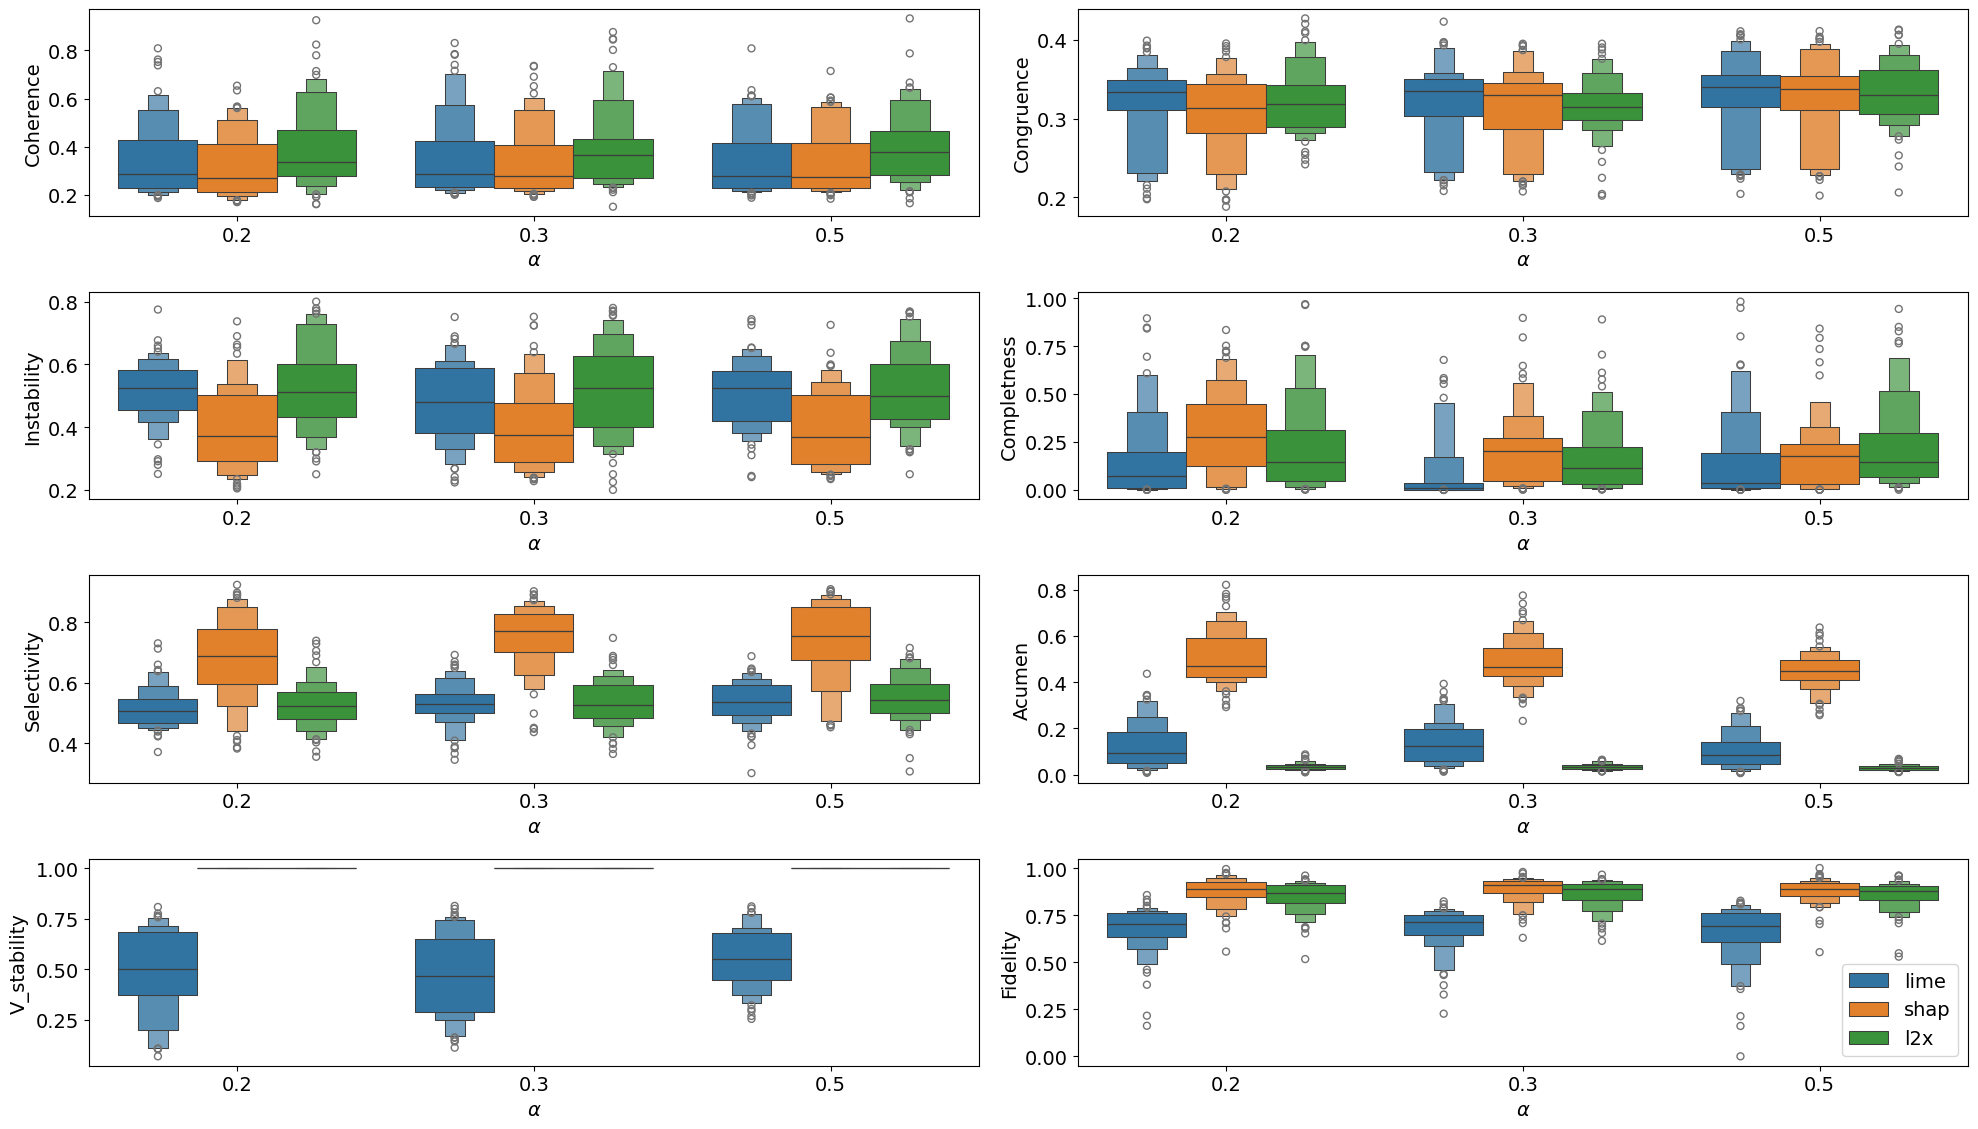

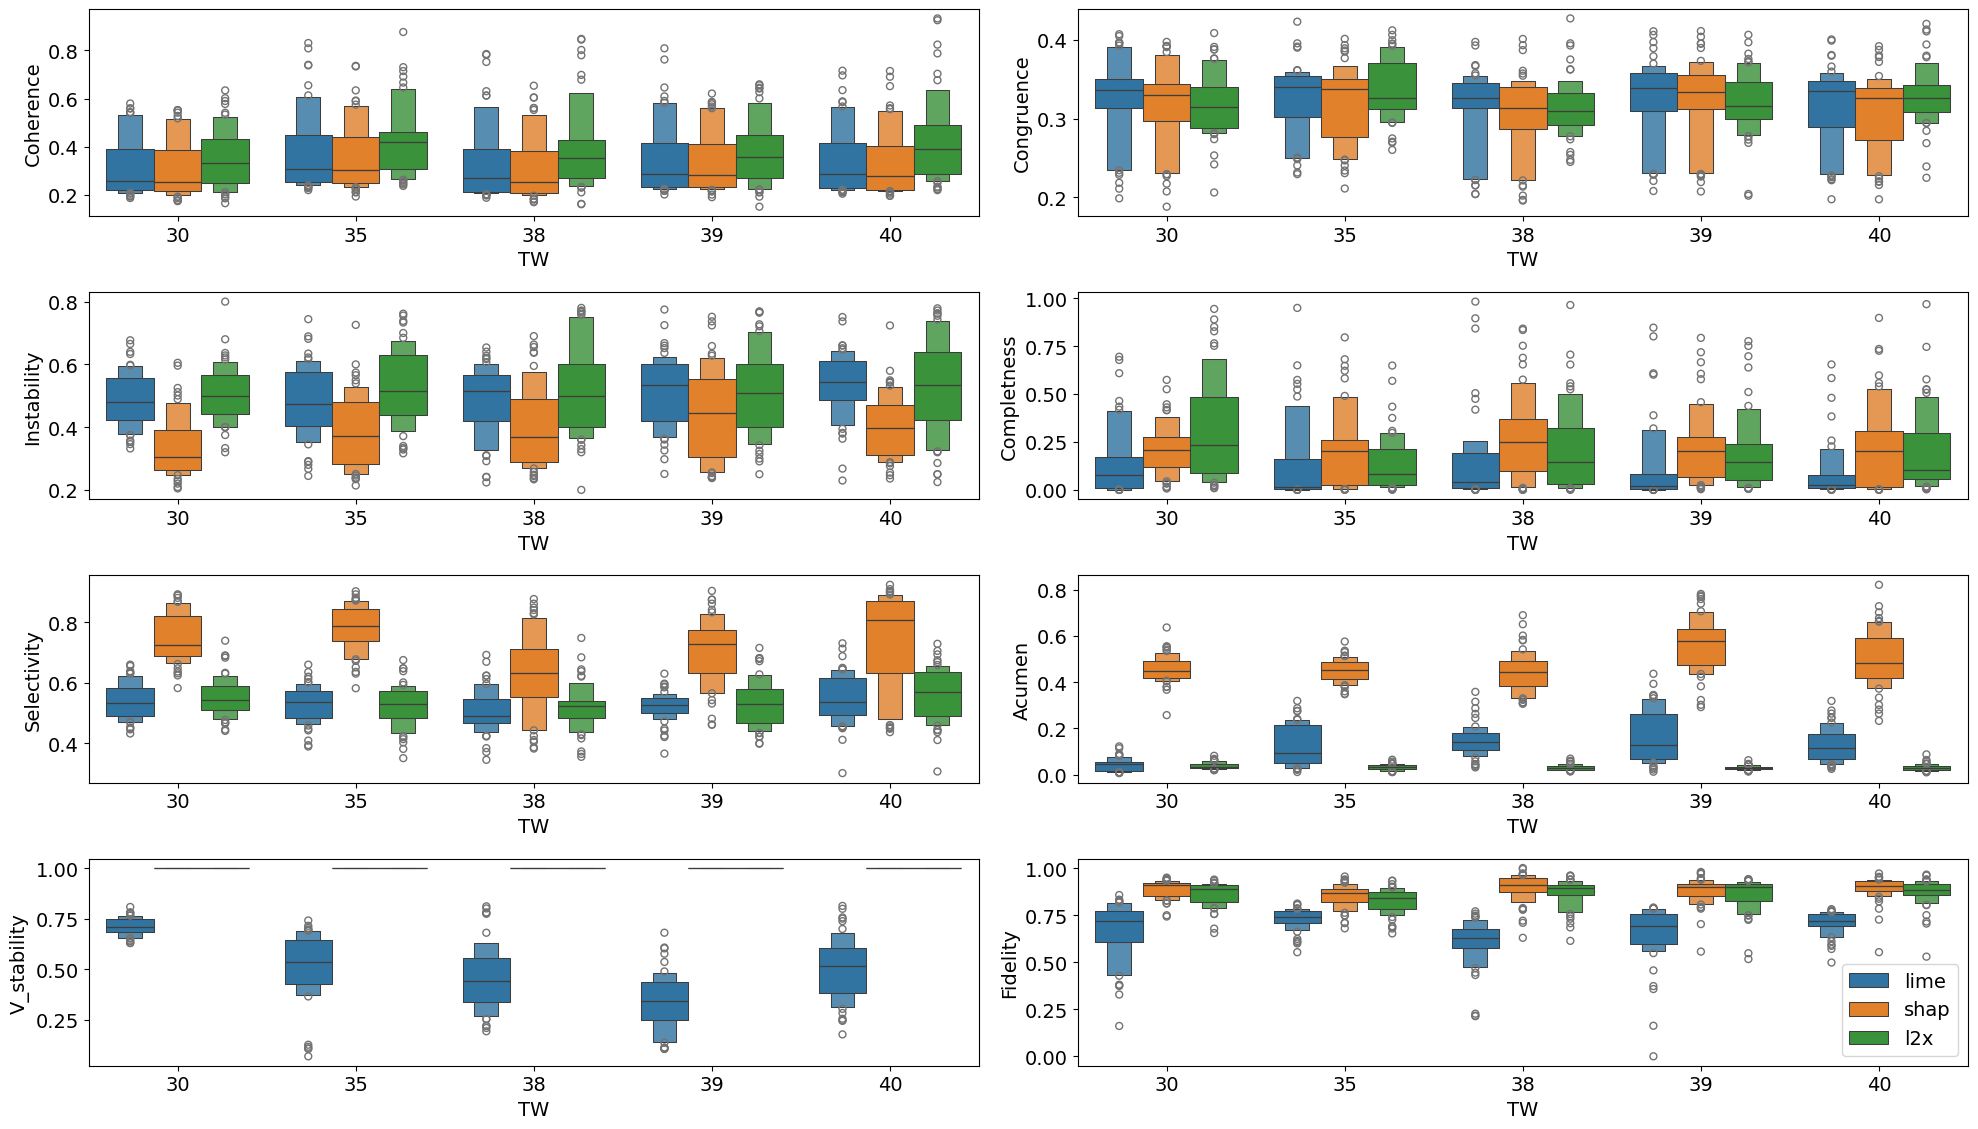

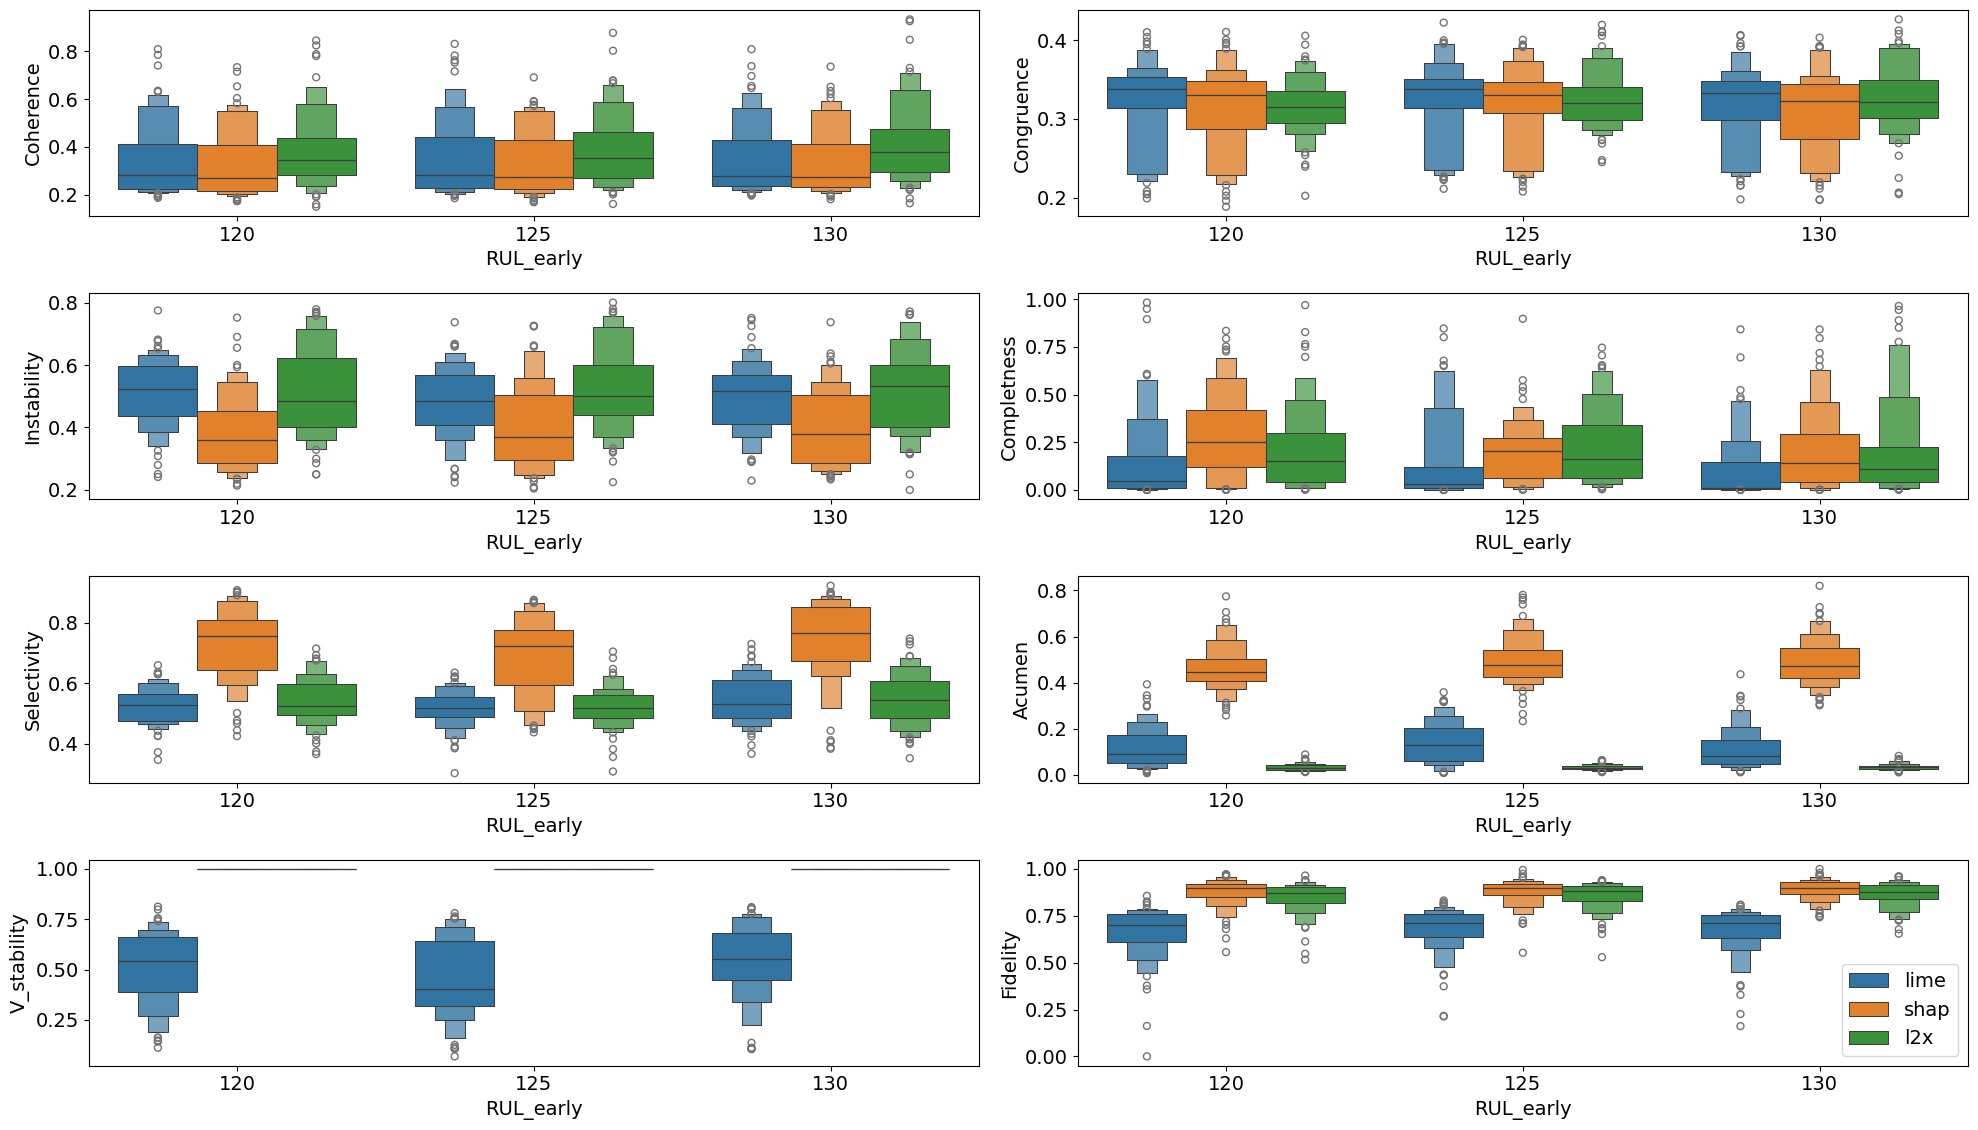

In [23]:
df001.columns = ['Identity', 'Separability', 'Stability', 'Coherence', 'Completness',
       'Congruence', 'Selectivity', 'Acumen', 'V_stability', 'Fidelity',
       'Sparsity', 'Instability', 'alpha', 'RUL_early', 'sequence_length',
       'explainer', 'Id', 'RMSE', 'std_RMSE', 'S_score', 'std_S_score', 'MSE',
       'std_MSE', 'dropout', 'activation', 'batch_size', 'TW']

affiche_metric_by_method('alpha', df001, save=True, path='fd001_result/images/alpha.png')
affiche_metric_by_method('TW', df001, save=True, path='fd001_result/images/TW.png')
affiche_metric_by_method('RUL_early', df001, save=True, path='fd001_result/images/RUL_early.png')

#### FD002

In [24]:
df002 = pd.read_csv('fd002_result/data_clean/data_clean.csv')
df002.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'upper_y', 'alpha_y', 'Unnamed: 0_y'], inplace=True)
df002.columns = nom_col

df = df002
completeness = np.where(df["completness"] >= 1, 1/df["completness"], df["completness"])
df["completness"] = completeness

# for df in df_quality:
    # fidelity = (df["fidelity"] - min(df["fidelity"])) / (max(df["completness"]) - min(df["completness"]))
fidelity = df["fidelity"]
fidelity = min_max_normalize(fidelity)
df["fidelity"] = fidelity
df002 = df

# 39 0.3 125	39	0.3	125

query = 'TW==39 & RUL_early==125 & alpha==0.3'
df_synth002 = Formated_optim_result(df=df002, query=query)
df_synth002['data'] = 'fd002'
df_synth002

,identity,separability,stability,coherence,congruence,instability,accumen,Verm_stability,fidelity,completness,selectivity,explainer,data
explainer,,,,,,,,,,,,,
l2x,1.0(0.0),1.0(0.0),1.0(0.0),0.35(0.1),0.32(0.04),0.53(0.1),0.03(0.01),1.0(0.0),0.76(0.01),0.19(0.13),0.6(0.05),l2x,fd002
lime,1.0(0.0),1.0(0.0),1.0(0.0),0.29(0.1),0.32(0.04),0.53(0.16),0.09(0.07),0.52(0.06),0.56(0.08),0.34(0.37),0.62(0.02),lime,fd002
shap,1.0(0.0),1.0(0.0),1.0(0.0),0.29(0.1),0.32(0.04),0.48(0.11),0.77(0.01),1.0(0.0),0.75(0.03),0.34(0.37),0.87(0.03),shap,fd002


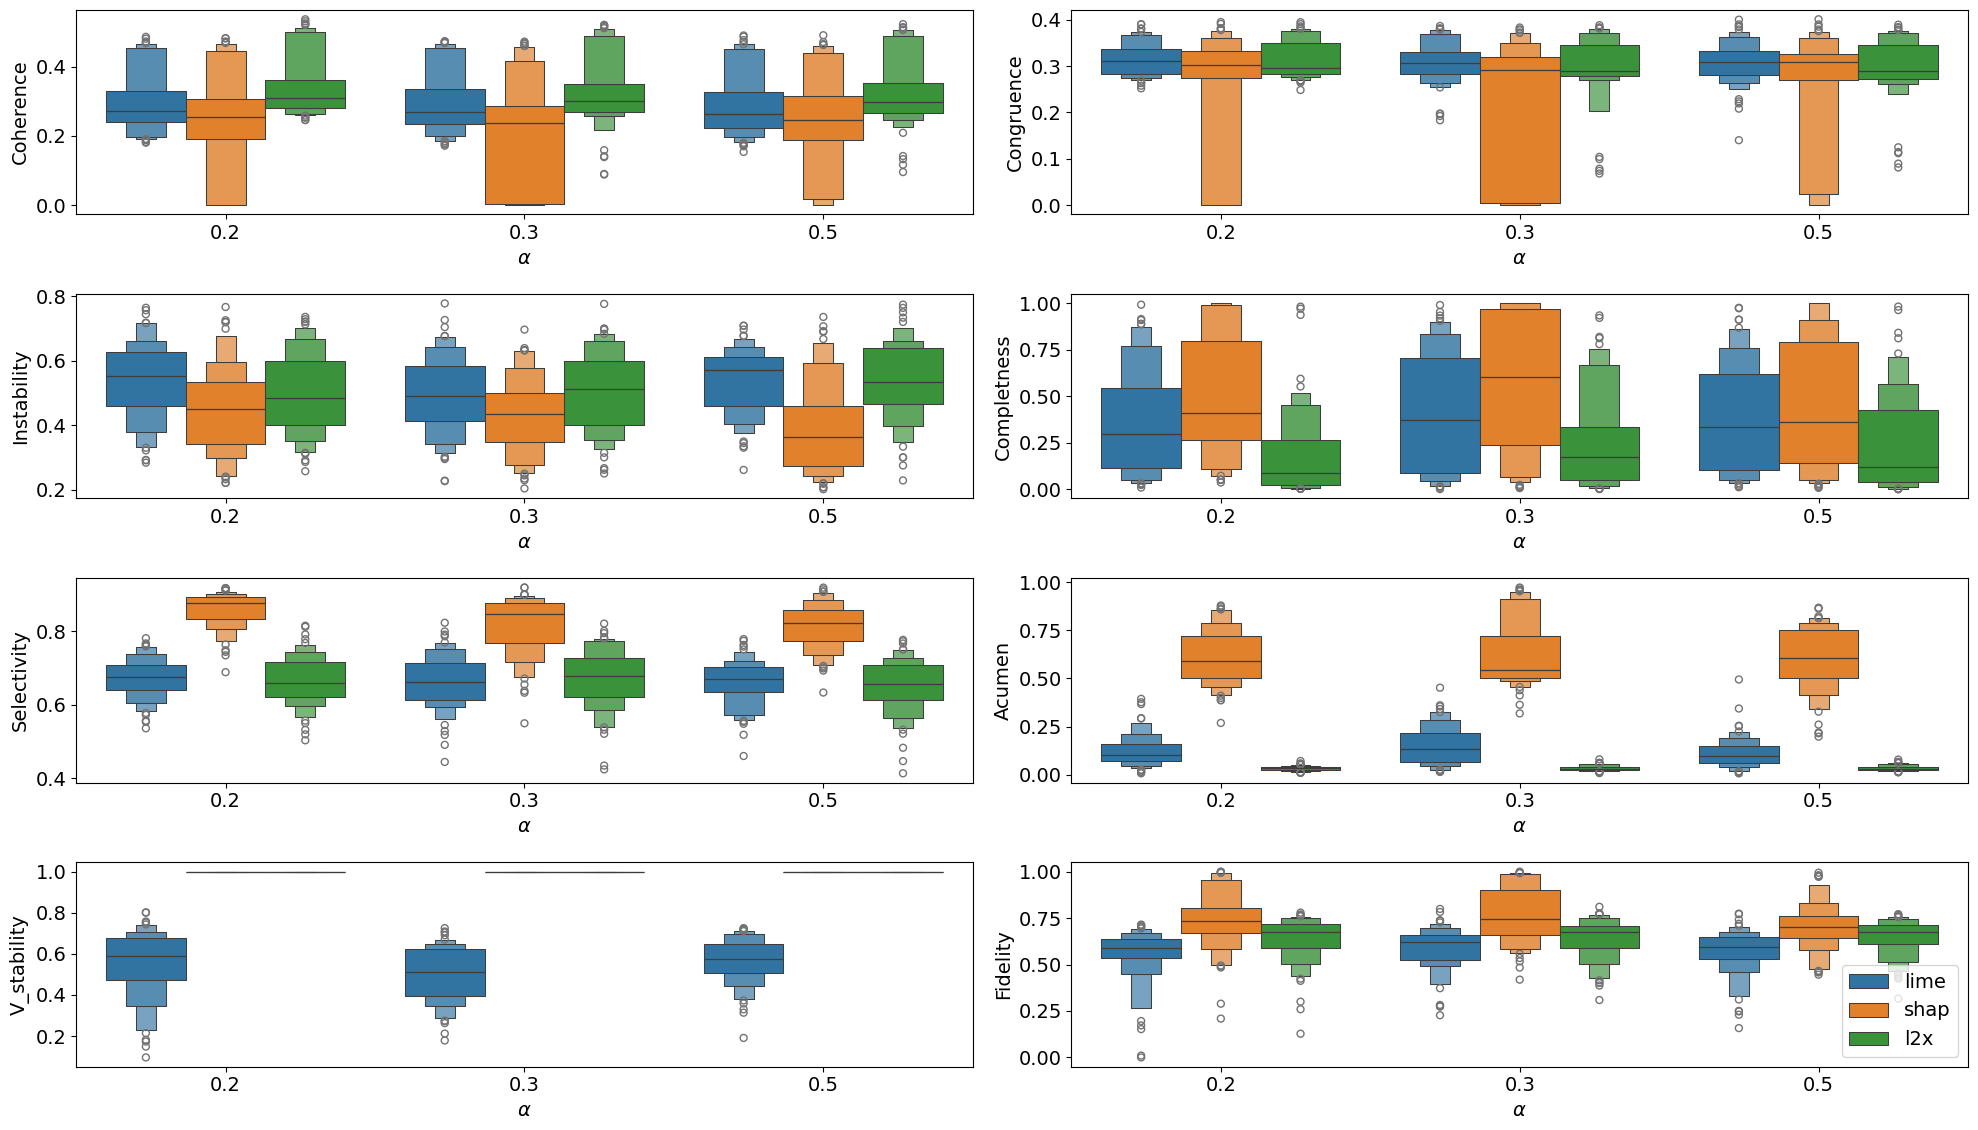

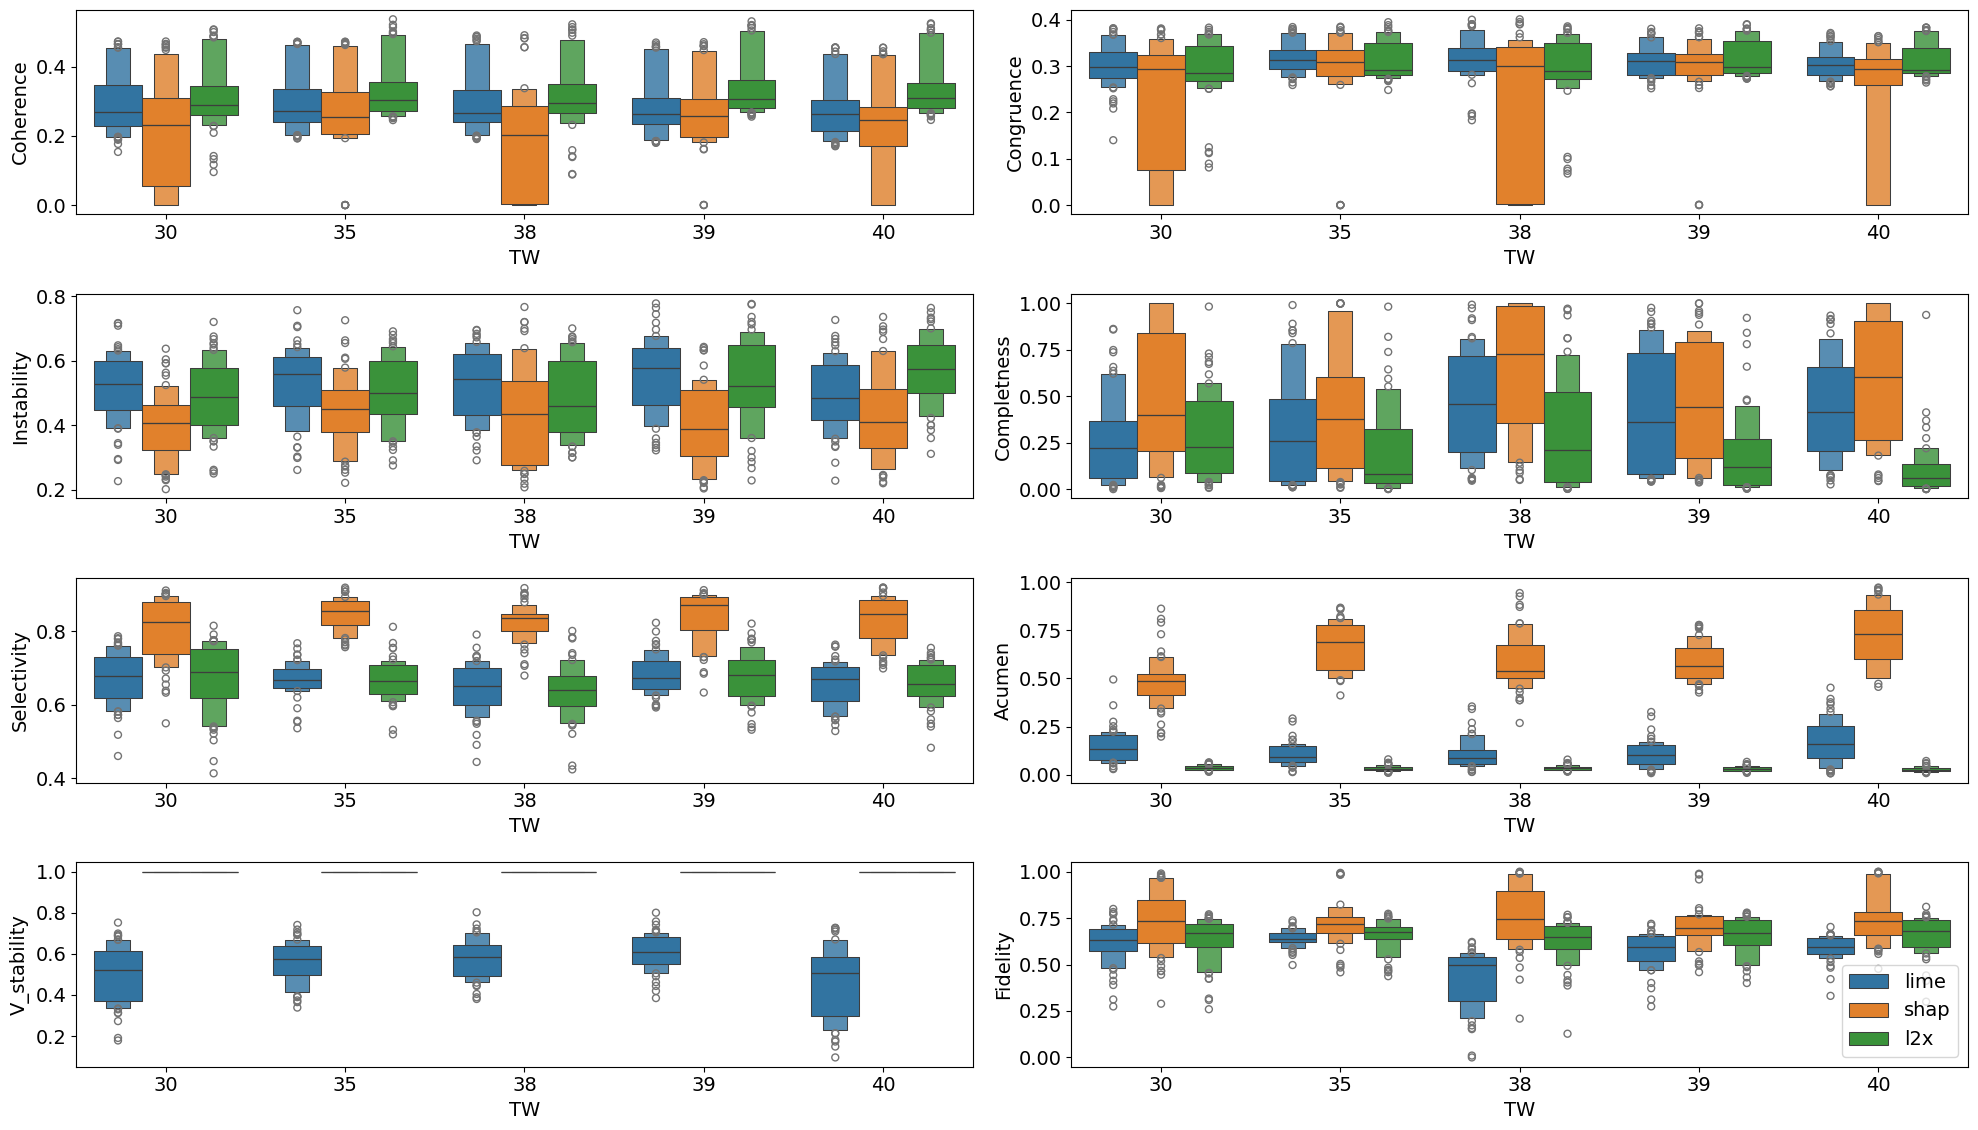

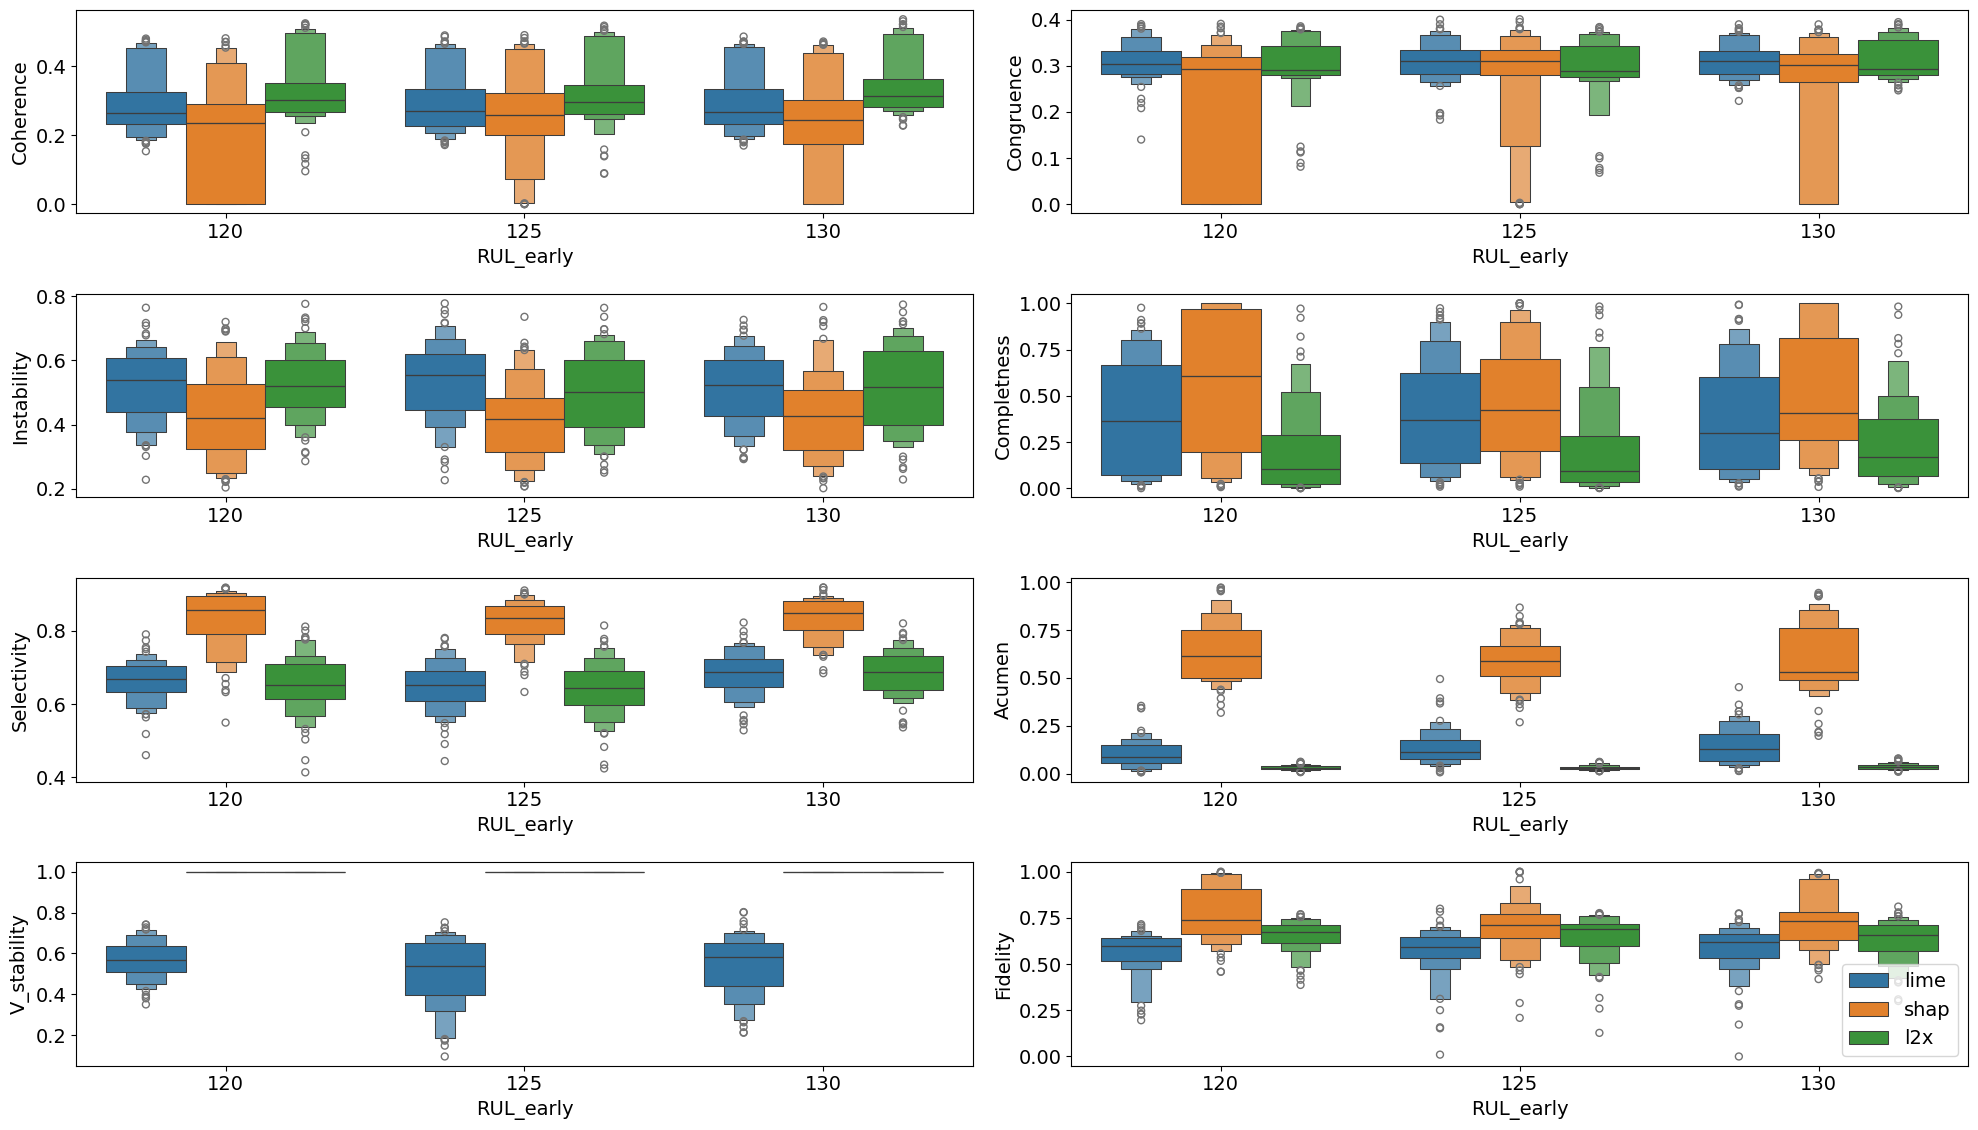

In [25]:
df002.columns = ['Identity', 'Separability', 'Stability', 'Coherence', 'Completness',
       'Congruence', 'Selectivity', 'Acumen', 'V_stability', 'Fidelity',
       'Sparsity', 'Instability', 'alpha', 'RUL_early', 'sequence_length',
       'explainer', 'Id', 'RMSE', 'std_RMSE', 'S_score', 'std_S_score', 'MSE',
       'std_MSE', 'dropout', 'activation', 'batch_size', 'TW']

affiche_metric_by_method('alpha', df002, save=True, path='fd002_result/images/alpha.png')
affiche_metric_by_method('TW', df002, save=True, path='fd002_result/images/TW.png')
affiche_metric_by_method('RUL_early', df002, save=True, path='fd002_result/images/RUL_early.png')

#### FD003

In [38]:
df003 = pd.read_csv('fd003_result/data_clean/data_clean.csv')
df003.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'upper_y', 'alpha_y', 'Unnamed: 0_y'], inplace=True)
df003.columns = nom_col

df = df003
completeness = np.where(df["completness"] >= 1, 1/df["completness"], df["completness"])
df["completness"] = completeness

# for df in df_quality:
    # fidelity = (df["fidelity"] - min(df["fidelity"])) / (max(df["completness"]) - min(df["completness"]))
fidelity = df["fidelity"]
fidelity = min_max_normalize(fidelity)
df["fidelity"] = fidelity
df003 = df

## Pour coherence 
coherence = df["coherence"]
coherence = min_max_normalize(coherence)
df["coherence"] = coherence
df003 = df

# 30	0.3	125	300.3125
query = 'TW==30 & RUL_early==125 & alpha==0.3'
df_synth003 = Formated_optim_result(df=df003, query=query)
df_synth003['data'] = 'fd003'
df_synth003

,identity,separability,stability,coherence,congruence,instability,accumen,Verm_stability,fidelity,completness,selectivity,explainer,data
explainer,,,,,,,,,,,,,
l2x,1.0(0.0),1.0(0.0),1.0(0.0),0.24(0.31),0.41(0.39),0.52(0.09),0.03(0.01),1.0(0.0),0.72(0.11),0.38(0.35),0.61(0.07),l2x,fd003
lime,1.0(0.0),1.0(0.0),1.0(0.0),0.15(0.08),0.27(0.13),0.59(0.06),0.02(0.01),0.68(0.09),0.65(0.16),0.2(0.21),0.66(0.03),lime,fd003
shap,1.0(0.0),1.0(0.0),1.0(0.0),0.0(0.0),0.0(0.0),0.31(0.09),0.49(0.02),1.0(0.0),0.92(0.03),0.98(0.02),0.79(0.03),shap,fd003


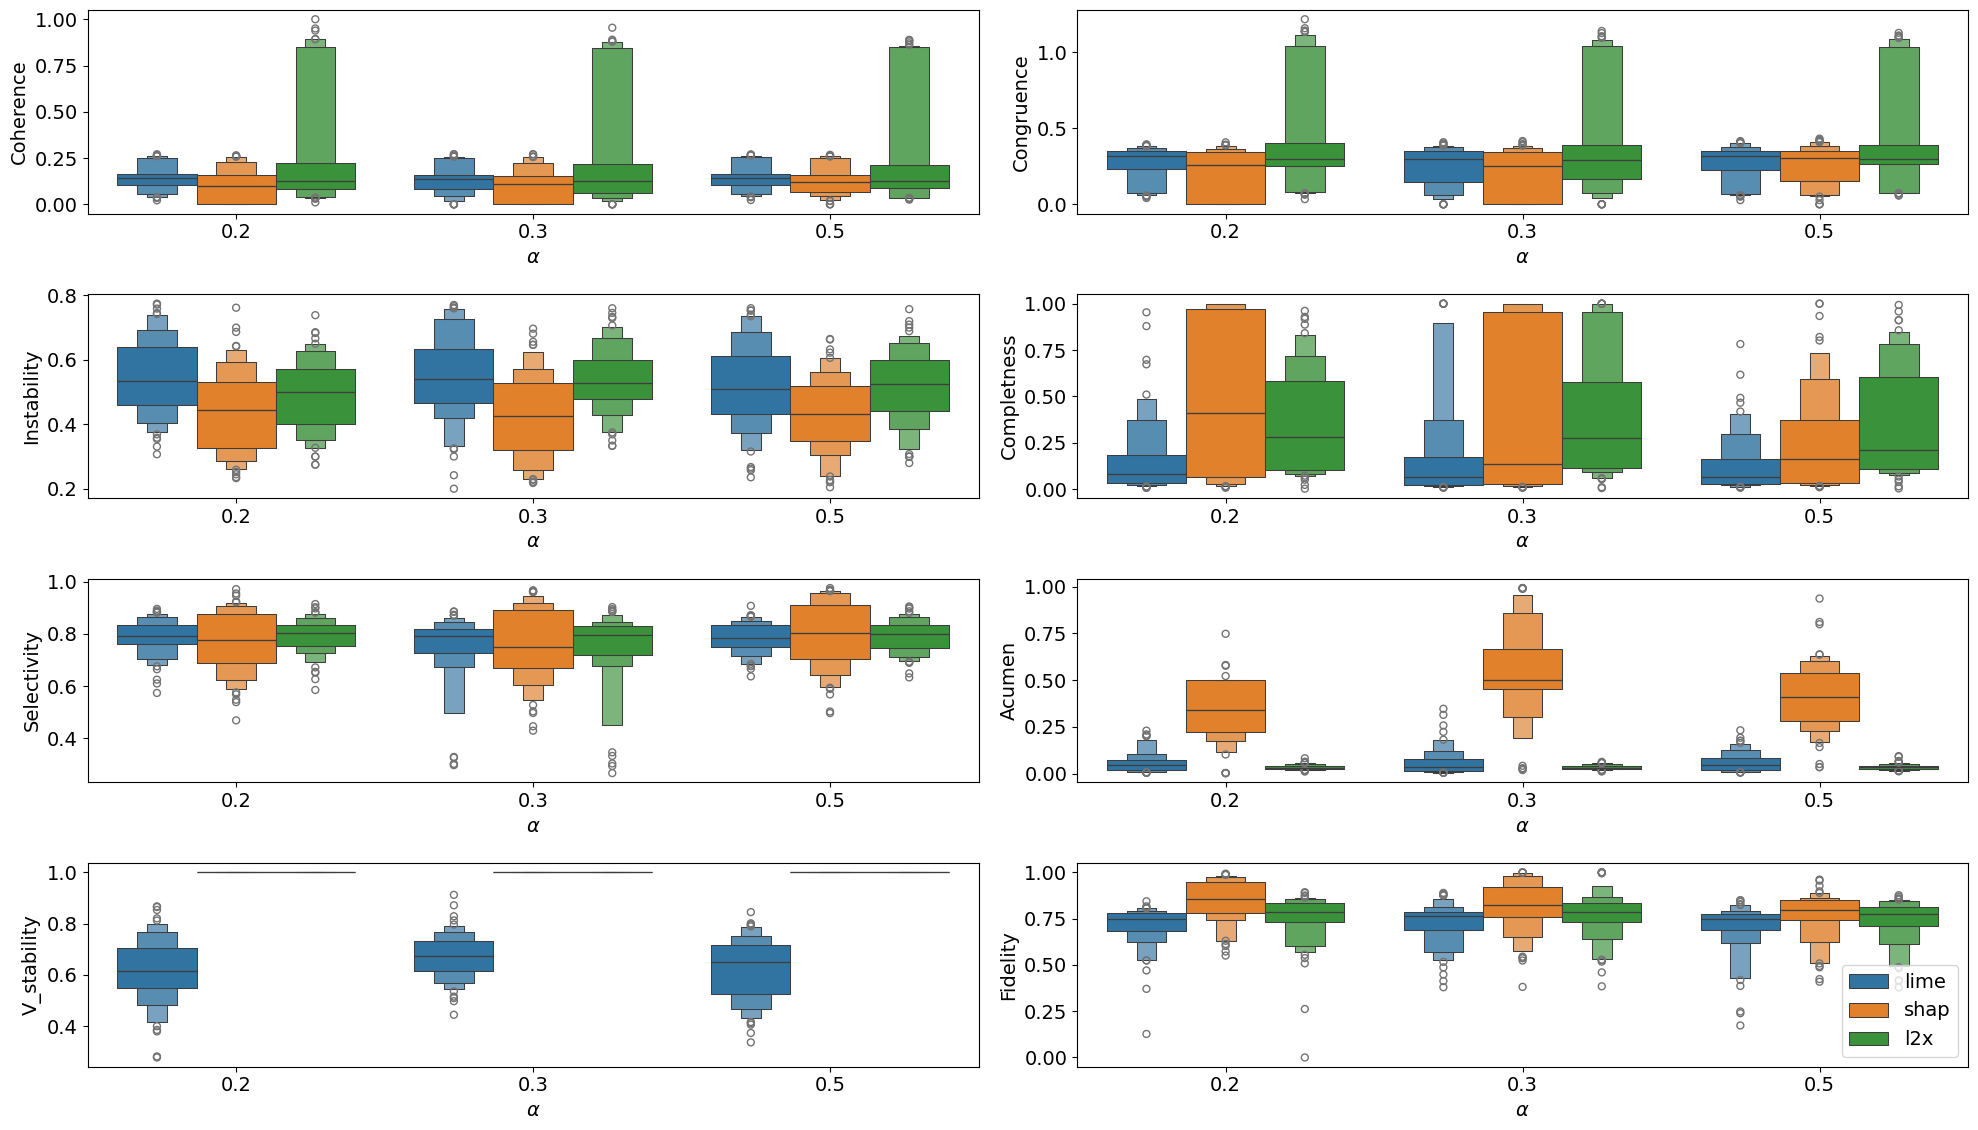

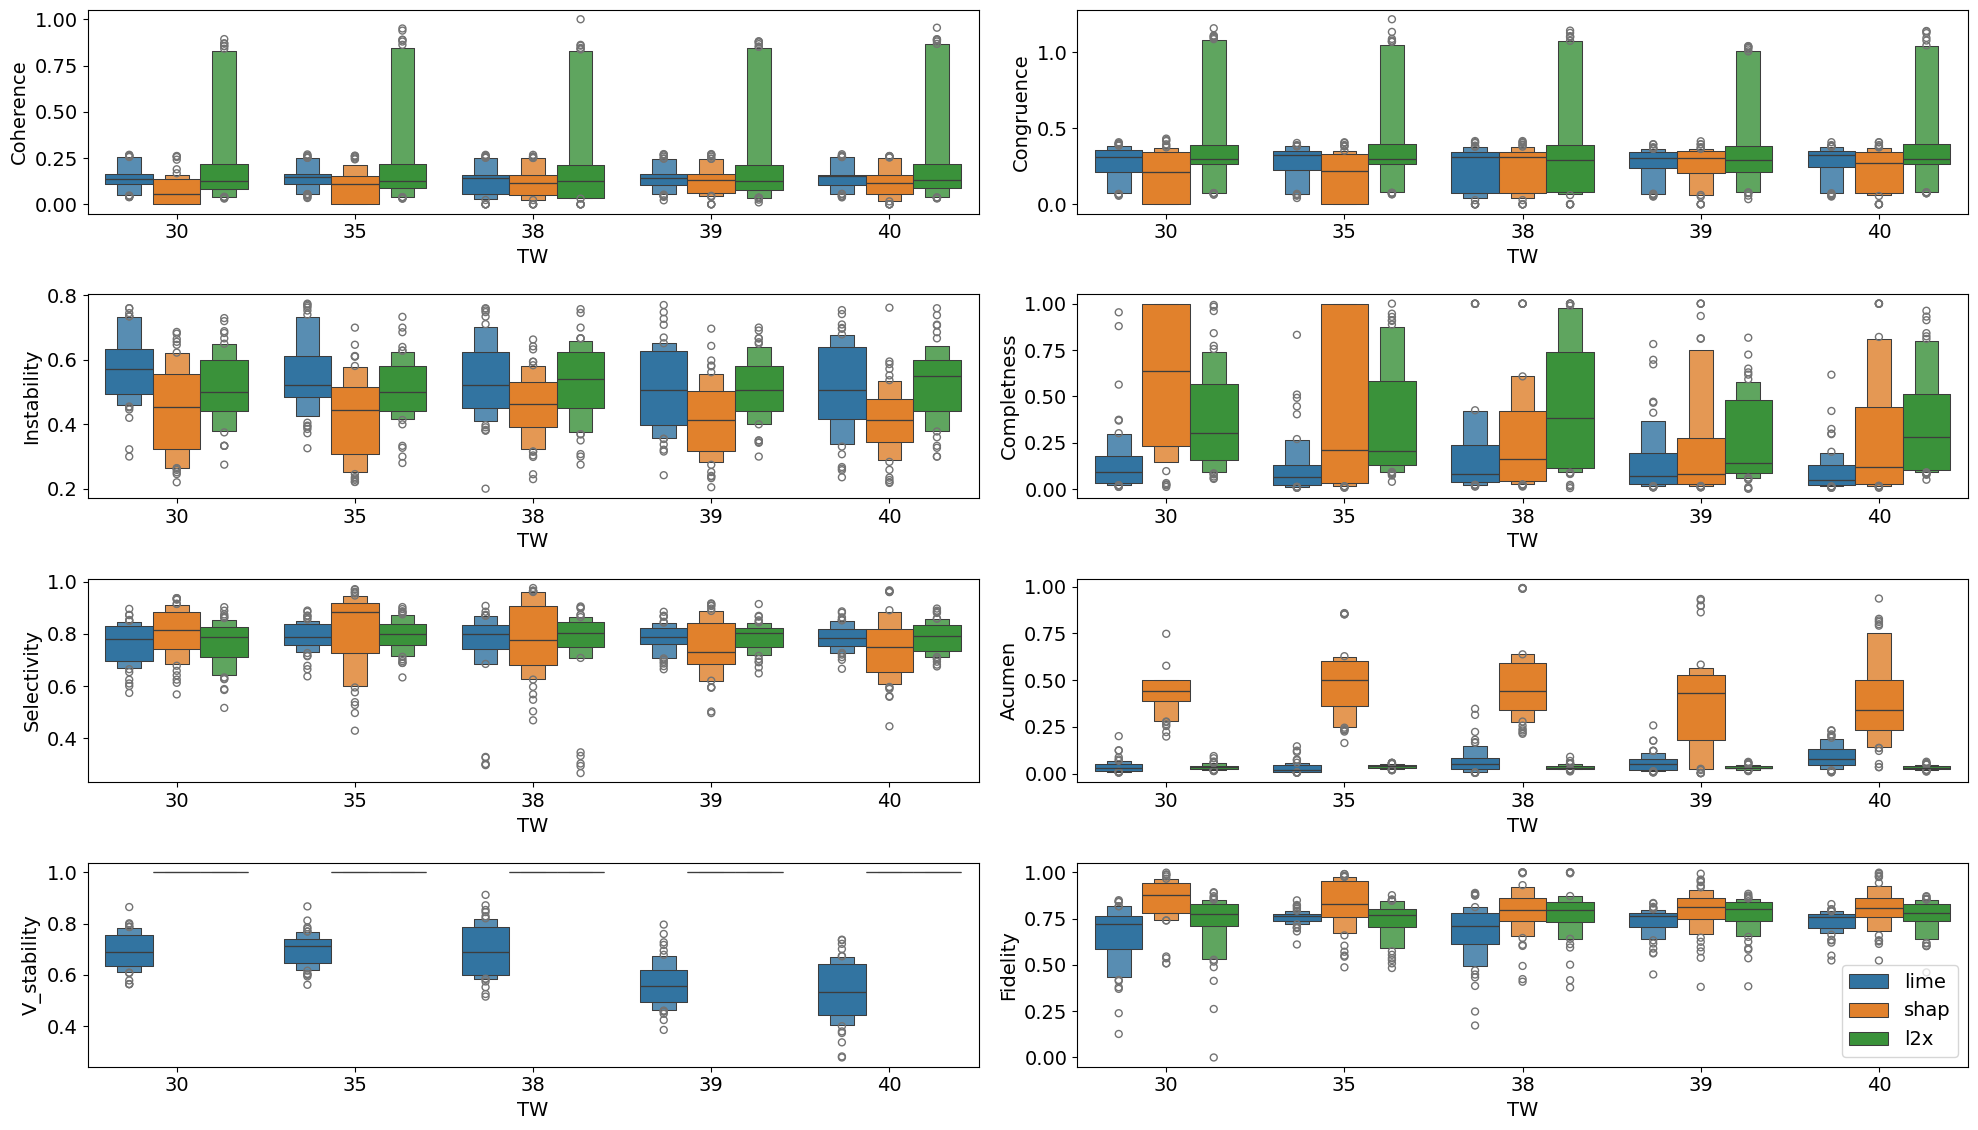

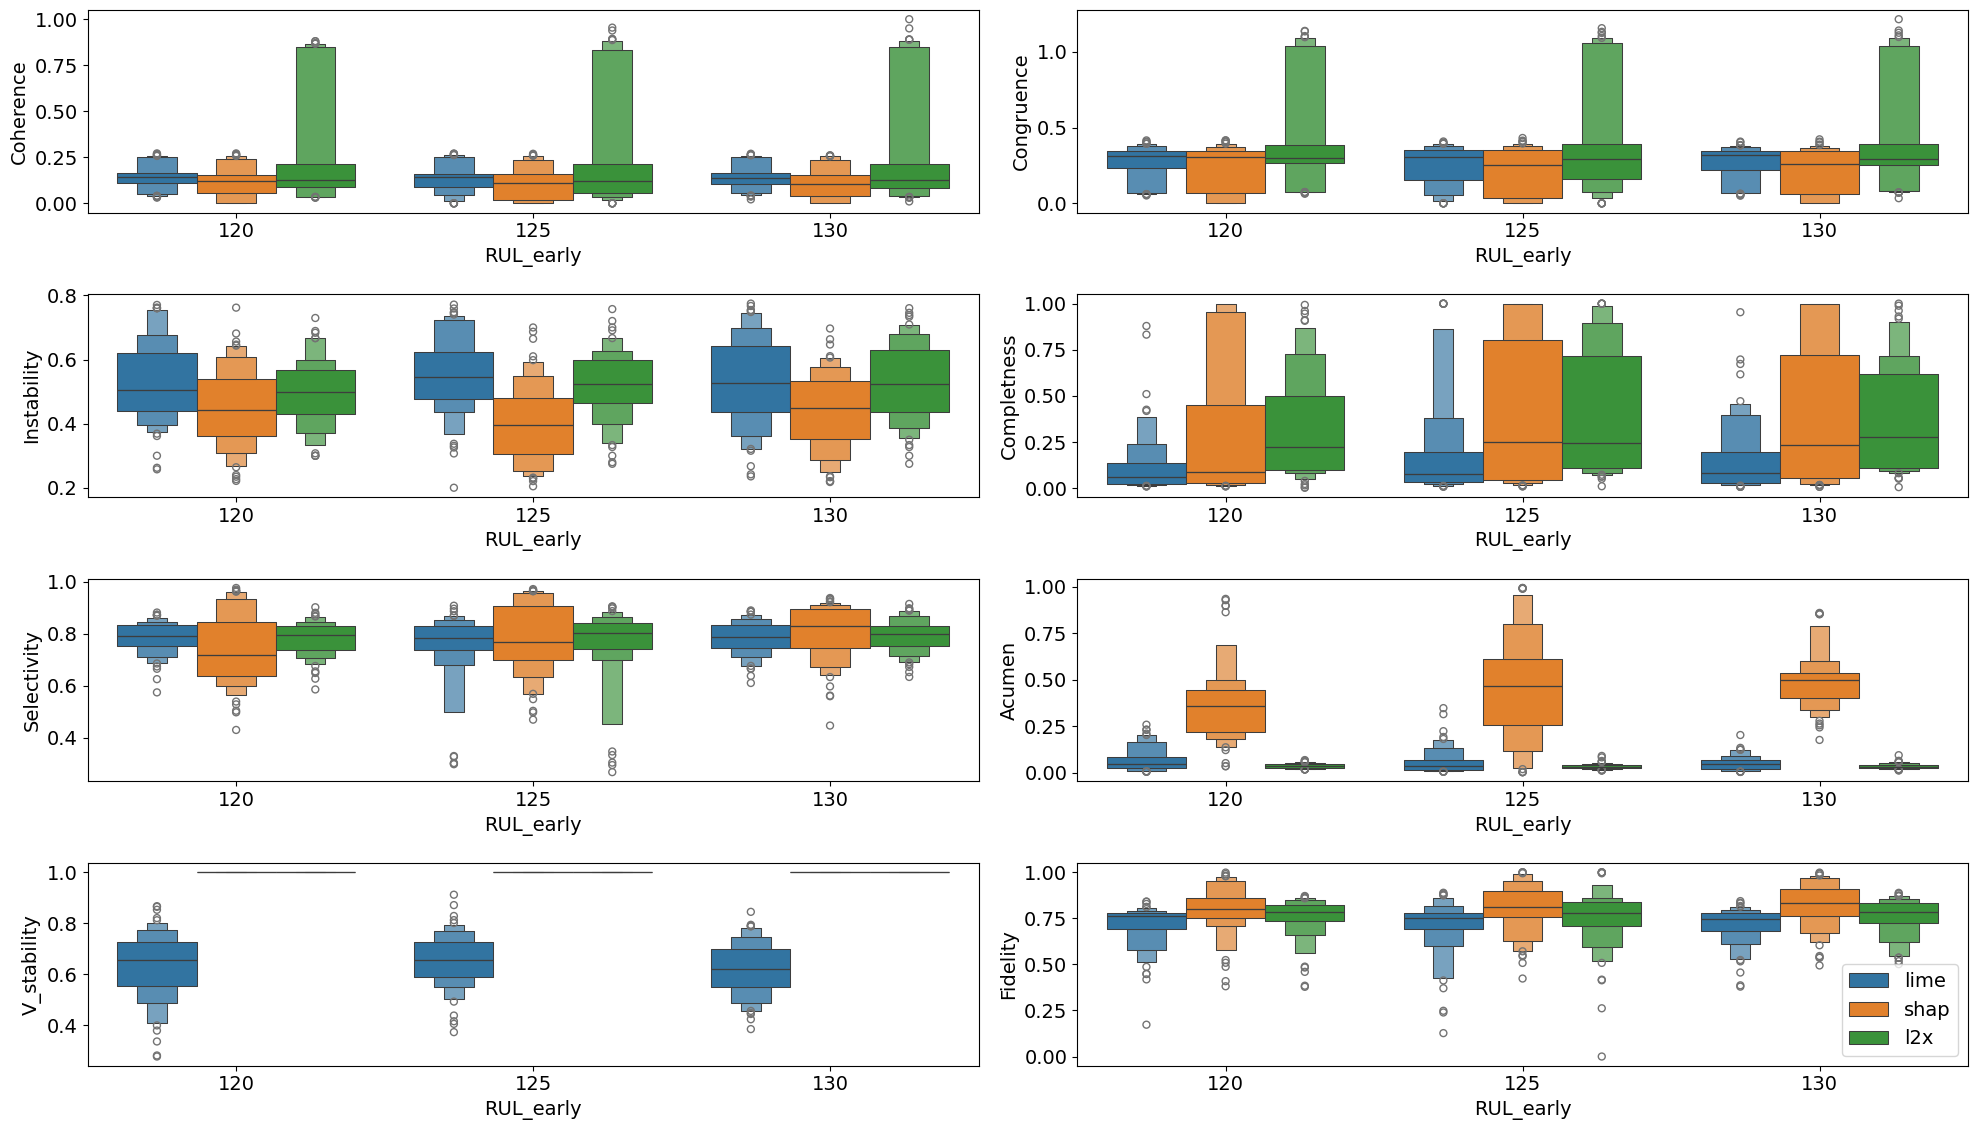

In [39]:
df003.columns = ['Identity', 'Separability', 'Stability', 'Coherence', 'Completness',
       'Congruence', 'Selectivity', 'Acumen', 'V_stability', 'Fidelity',
       'Sparsity', 'Instability', 'alpha', 'RUL_early', 'sequence_length',
       'explainer', 'Id', 'RMSE', 'std_RMSE', 'S_score', 'std_S_score', 'MSE',
       'std_MSE', 'dropout', 'activation', 'batch_size', 'TW']

affiche_metric_by_method('alpha', df003, save=True, path='fd003_result/images/alpha.png')
affiche_metric_by_method('TW', df003, save=True, path='fd003_result/images/TW.png')
affiche_metric_by_method('RUL_early', df003, save=True, path='fd003_result/images/RUL_early.png')

#### FD004

In [28]:
# 64	30	0.2	120	300.2120
df004 = pd.read_csv('fd004_result/data_clean/data_clean.csv')
df004.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'upper_y', 'alpha_y', 'Unnamed: 0_y'], inplace=True)
df004.columns = nom_col

df = df004
completeness = np.where(df["completness"] >= 1, 1/df["completness"], df["completness"])
df["completness"] = completeness

# for df in df_quality:
    # fidelity = (df["fidelity"] - min(df["fidelity"])) / (max(df["completness"]) - min(df["completness"]))
fidelity = df["fidelity"]
fidelity = min_max_normalize(fidelity)
df["fidelity"] = fidelity
df004 = df

query = 'TW==30 & RUL_early==120 & alpha==0.2'
df_synth004 = Formated_optim_result(df=df004, query=query)
df_synth004['data'] = 'fd004'
df_synth004

,identity,separability,stability,coherence,congruence,instability,accumen,Verm_stability,fidelity,completness,selectivity,explainer,data
explainer,,,,,,,,,,,,,
l2x,1.0(0.0),1.0(0.0),1.0(0.0),0.32(0.07),0.28(0.05),0.55(0.12),0.05(0.03),1.0(0.0),0.43(0.09),0.23(0.18),0.66(0.05),l2x,fd004
lime,1.0(0.0),1.0(0.0),1.0(0.0),0.3(0.08),0.26(0.06),0.53(0.12),0.07(0.02),0.75(0.05),0.4(0.09),0.13(0.11),0.67(0.02),lime,fd004
shap,1.0(0.0),1.0(0.0),1.0(0.0),0.29(0.08),0.26(0.06),0.31(0.1),0.46(0.11),1.0(0.0),0.52(0.07),0.18(0.11),0.74(0.03),shap,fd004


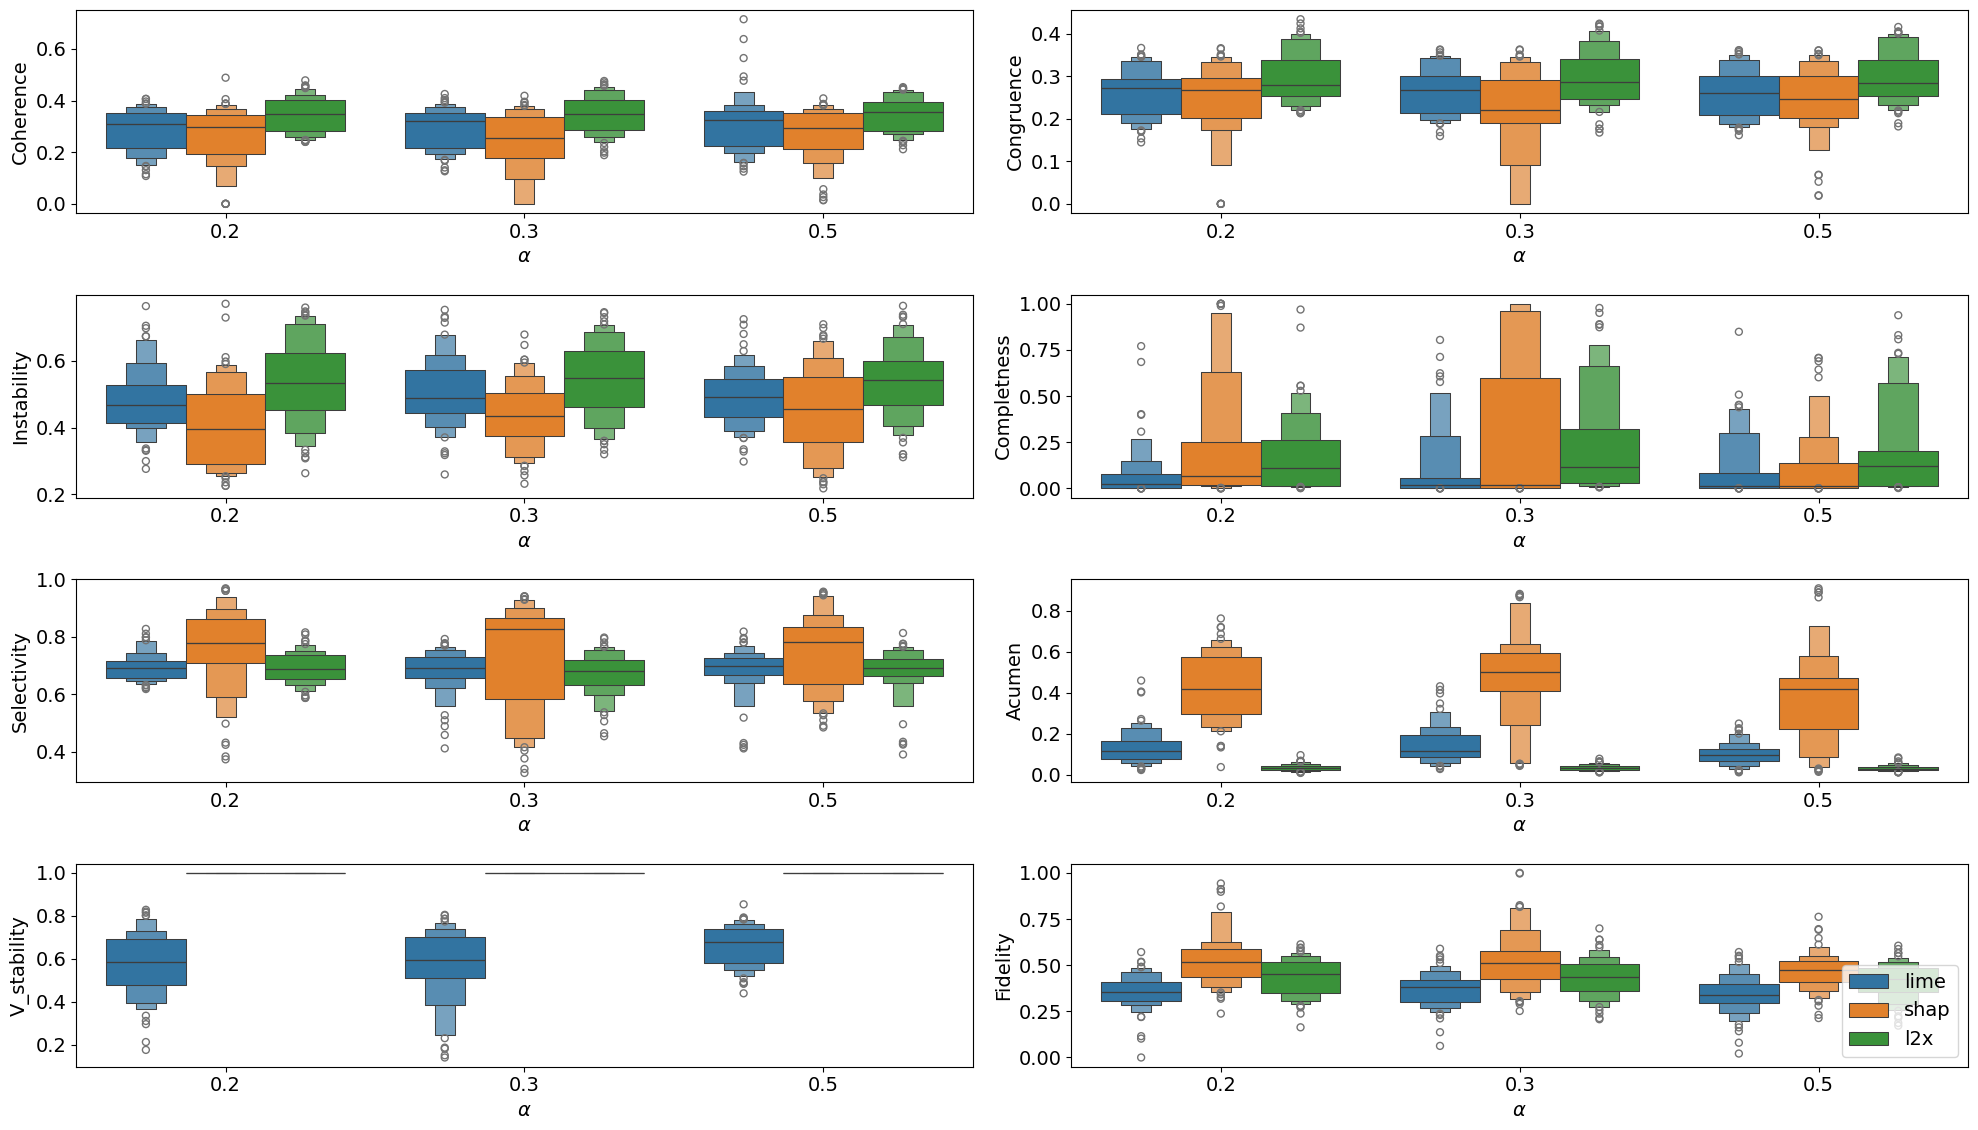

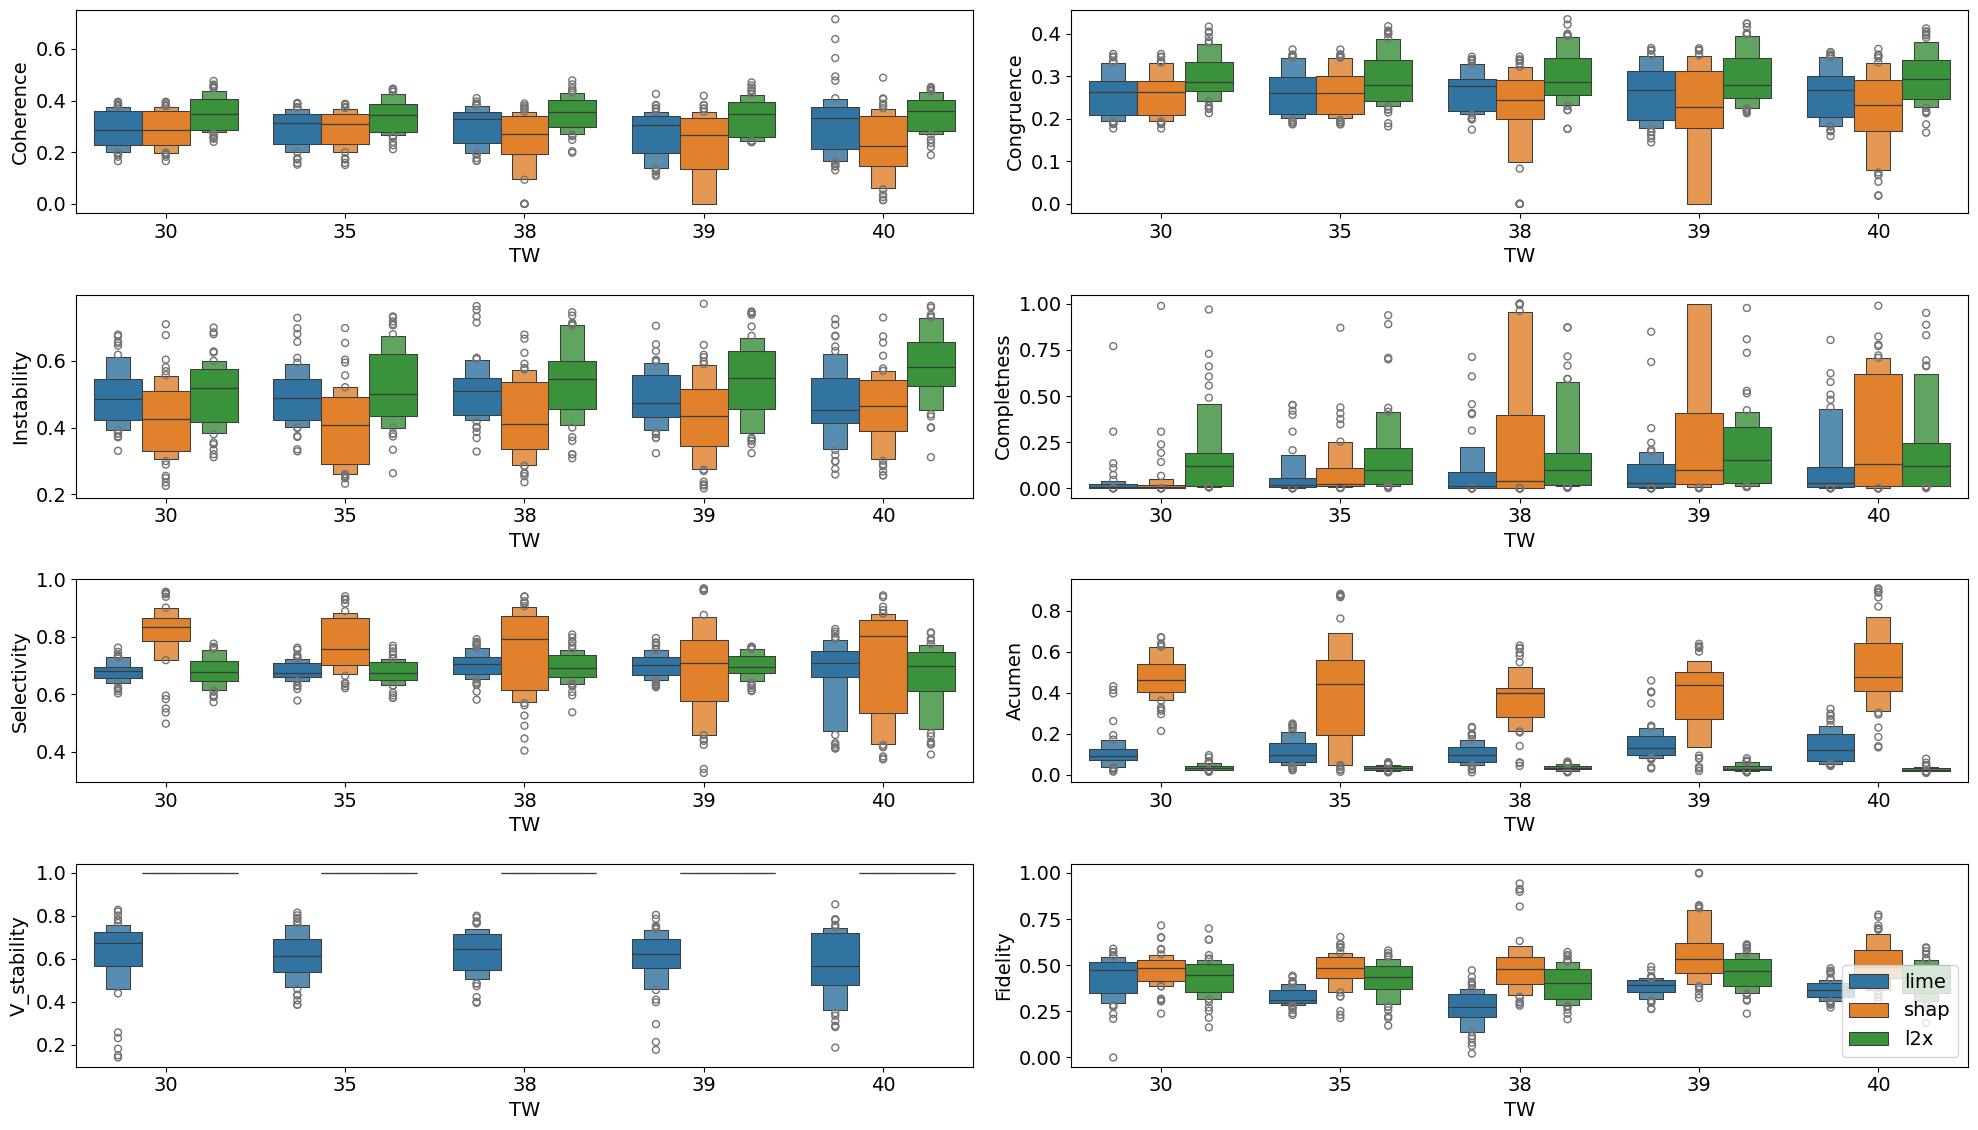

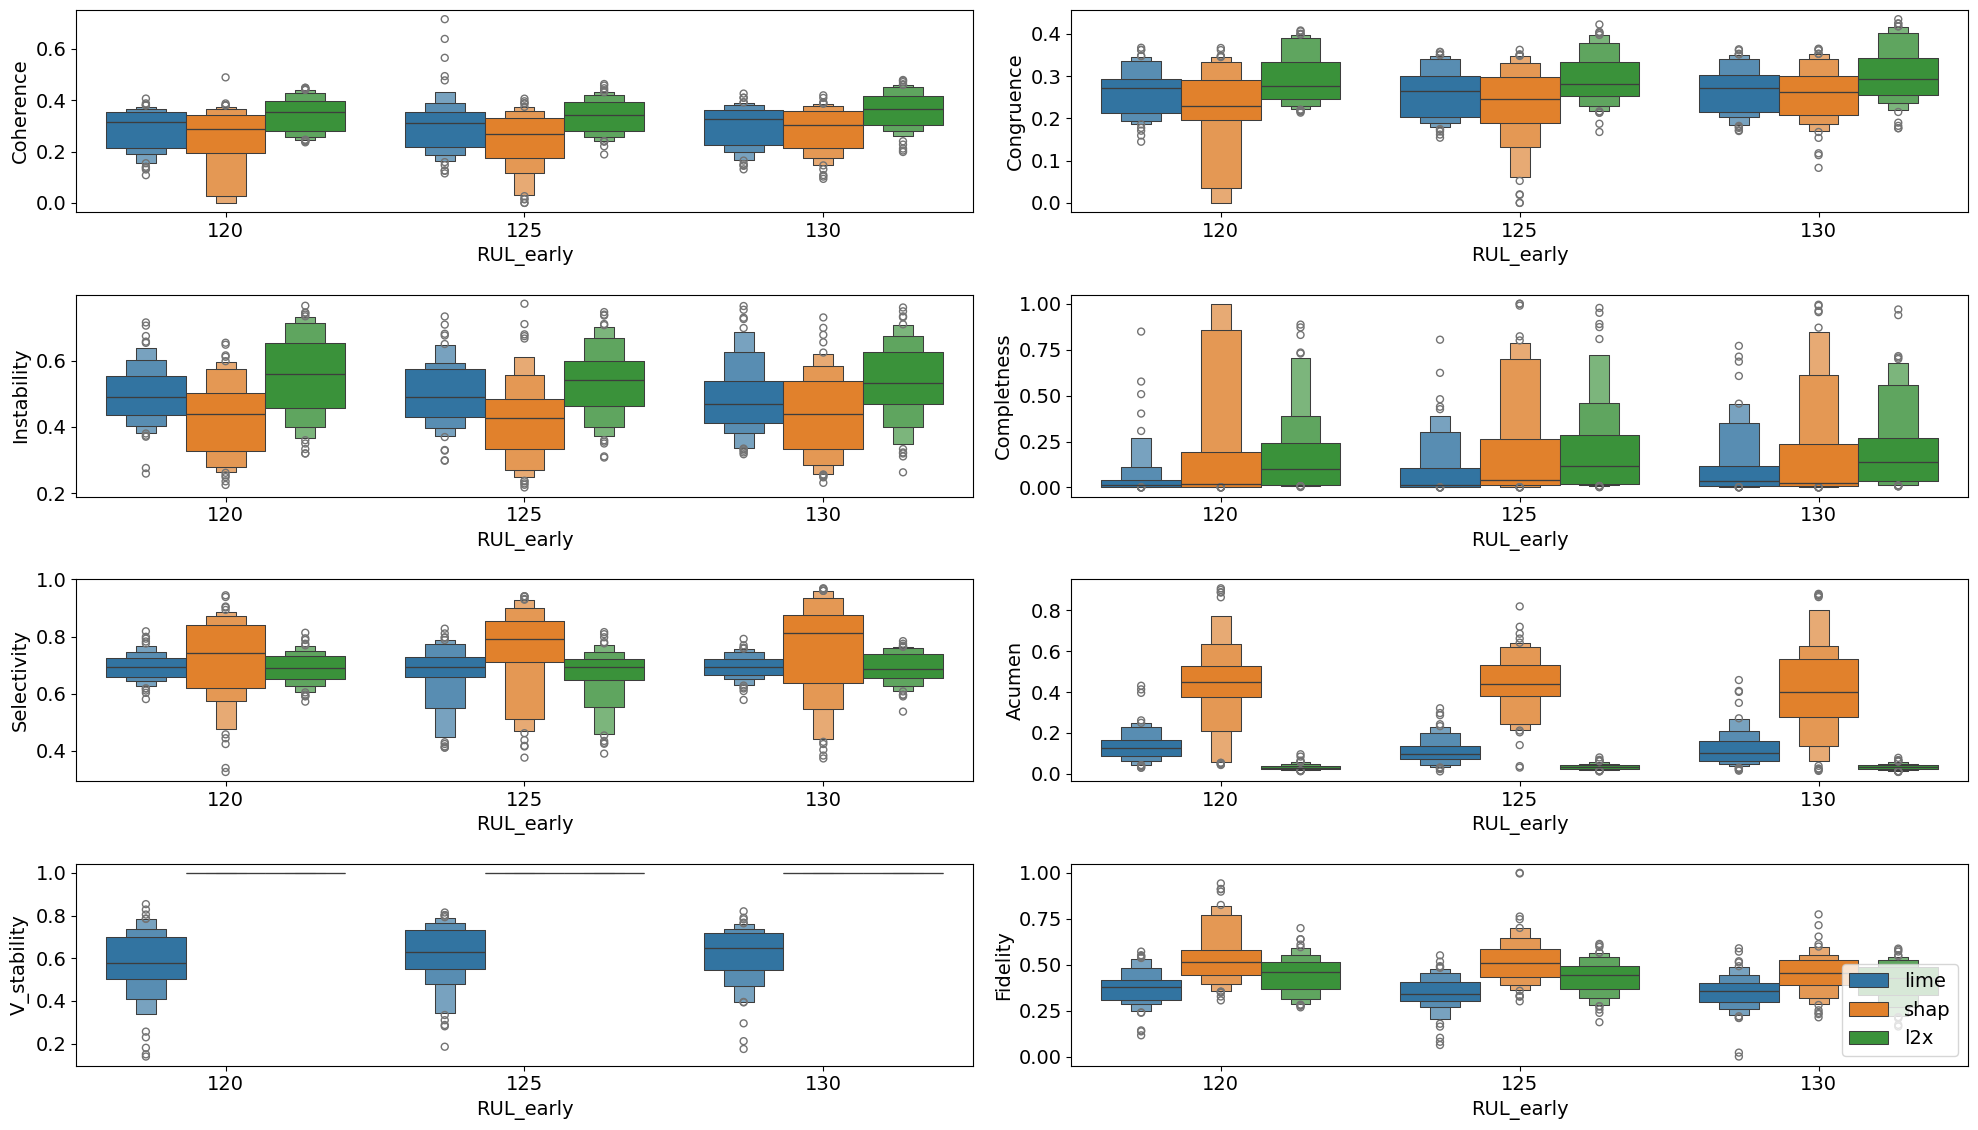

In [29]:
df004.columns = ['Identity', 'Separability', 'Stability', 'Coherence', 'Completness',
       'Congruence', 'Selectivity', 'Acumen', 'V_stability', 'Fidelity',
       'Sparsity', 'Instability', 'alpha', 'RUL_early', 'sequence_length',
       'explainer', 'Id', 'RMSE', 'std_RMSE', 'S_score', 'std_S_score', 'MSE',
       'std_MSE', 'dropout', 'activation', 'batch_size', 'TW']

affiche_metric_by_method('alpha', df004, save=True, path='fd004_result/images/alpha.png')
affiche_metric_by_method('TW', df004, save=True, path='fd004_result/images/TW.png')
affiche_metric_by_method('RUL_early', df004, save=True, path='fd004_result/images/RUL_early.png')

In [30]:
df_synth = pd.concat([df_synth001,
                      df_synth002,
                      df_synth003,
                      df_synth004], ignore_index = True)
df_synth.to_excel('fd001_result/data_clean/top_quality.xlsx')

In [31]:
df_synth

,identity,separability,stability,coherence,congruence,instability,accumen,Verm_stability,fidelity,completness,selectivity,explainer,data
0,1.0(0.0),1.0(0.0),1.0(0.0),0.43(0.14),0.35(0.03),0.48(0.13),0.02(0.01),1.0(0.0),0.84(0.06),0.22(0.24),0.6(0.04),l2x,fd001
1,1.0(0.0),1.0(0.0),1.0(0.0),0.36(0.14),0.34(0.06),0.47(0.1),0.03(0.03),0.65(0.02),0.77(0.04),0.23(0.41),0.58(0.03),lime,fd001
2,1.0(0.0),1.0(0.0),1.0(0.0),0.36(0.14),0.34(0.06),0.49(0.12),0.44(0.03),1.0(0.0),0.87(0.03),0.04(0.09),0.85(0.05),shap,fd001
3,1.0(0.0),1.0(0.0),1.0(0.0),0.35(0.1),0.32(0.04),0.53(0.1),0.03(0.01),1.0(0.0),0.76(0.01),0.19(0.13),0.6(0.05),l2x,fd002
4,1.0(0.0),1.0(0.0),1.0(0.0),0.29(0.1),0.32(0.04),0.53(0.16),0.09(0.07),0.52(0.06),0.56(0.08),0.34(0.37),0.62(0.02),lime,fd002
5,1.0(0.0),1.0(0.0),1.0(0.0),0.29(0.1),0.32(0.04),0.48(0.11),0.77(0.01),1.0(0.0),0.75(0.03),0.34(0.37),0.87(0.03),shap,fd002
6,1.0(0.0),1.0(0.0),1.0(0.0),0.49(0.62),0.41(0.39),0.52(0.09),0.03(0.01),1.0(0.0),0.72(0.11),0.38(0.35),0.61(0.07),l2x,fd003
7,1.0(0.0),1.0(0.0),1.0(0.0),0.3(0.16),0.27(0.13),0.59(0.06),0.02(0.01),0.68(0.09),0.65(0.16),0.2(0.21),0.66(0.03),lime,fd003
8,1.0(0.0),1.0(0.0),1.0(0.0),0.0(0.0),0.0(0.0),0.31(0.09),0.49(0.02),1.0(0.0),0.92(0.03),0.98(0.02),0.79(0.03),shap,fd003
9,1.0(0.0),1.0(0.0),1.0(0.0),0.32(0.07),0.28(0.05),0.55(0.12),0.05(0.03),1.0(0.0),0.43(0.09),0.23(0.18),0.66(0.05),l2x,fd004
